In [2]:
import pandas as pd

# Load the Excel file
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
xl = pd.ExcelFile(file_path)

# List available sheets
xl.sheet_names

['nationaldatabaseofchildcare']

In [4]:
# Load the primary sheet into a DataFrame
df = xl.parse('nationaldatabaseofchildcare')

# Show shape and first few rows
print(df.shape)
df.head()

(34567, 227)


State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0               3.0          81.40                 1.0          97.4   
1               3.0          85.68                 1.0         102.0   
2               3.0          89.96                 1.0         106.6   
3               3.0          94.25                 1.0         111.2   
4               3.0          98.53                 1.0         115.8   

   _75FCCInfant_flag  _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
0                1.0           97.4                 3.0             95.0   
1                1.0          102.0                 3.0            100.0   
2                1.0          106.6                 3.0            105.0   
3                1.0          111.2                 3.0            110.0   
4                1.0          115.8                 3.0            115.0   

   _75FCCPreschool_flag  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 227 columns]

In [6]:
# Show all column names
df.columns.tolist()

['State_Name',
 'State_Abbreviation',
 'County_Name',
 'County_FIPS_Code',
 'StudyYear',
 'UNR_16',
 'FUNR_16',
 'MUNR_16',
 'UNR_20to64',
 'FUNR_20to64',
 'MUNR_20to64',
 'FLFPR_20to64',
 'FLFPR_20to64_Under6',
 'FLFPR_20to64_6to17',
 'FLFPR_20to64_Under6_6to17',
 'MLFPR_20to64',
 'PR_F',
 'PR_P',
 'MHI',
 'ME',
 'FME',
 'MME',
 'MHI_2018',
 'ME_2018',
 'FME_2018',
 'MME_2018',
 'TotalPop',
 'OneRace',
 'OneRace_W',
 'OneRace_B',
 'OneRace_I',
 'OneRace_A',
 'OneRace_H',
 'OneRace_Other',
 'TwoRaces',
 'Hispanic',
 'Households',
 'H_Under6_BothWork',
 'H_Under6_FWork',
 'H_Under6_MWork',
 'H_Under6_SingleM',
 'H_6to17_BothWork',
 'H_6to17_Fwork',
 'H_6to17_Mwork',
 'H_6to17_SingleM',
 'EMP_M',
 'MEMP_M',
 'FEMP_M',
 'EMP_Service',
 'MEMP_Service',
 'FEMP_Service',
 'EMP_Sales',
 'MEMP_Sales',
 'FEMP_Sales',
 'EMP_N',
 'MEMP_N',
 'FEMP_N',
 'EMP_P',
 'MEMP_P',
 'FEMP_P',
 'iUNR_16',
 'iFUNR_16',
 'iMUNR_16',
 'iUNR_20to64',
 'iFUNR_20to64',
 'iMUNR_20to64',
 'iFLFPR_20to64',
 'iFLFPR_2

In [8]:
# Filter column names for relevant % income rate fields
funr_columns = [col for col in df.columns if col.startswith('FUNR')]
funr_columns

['FUNR_16', 'FUNR_20to64']

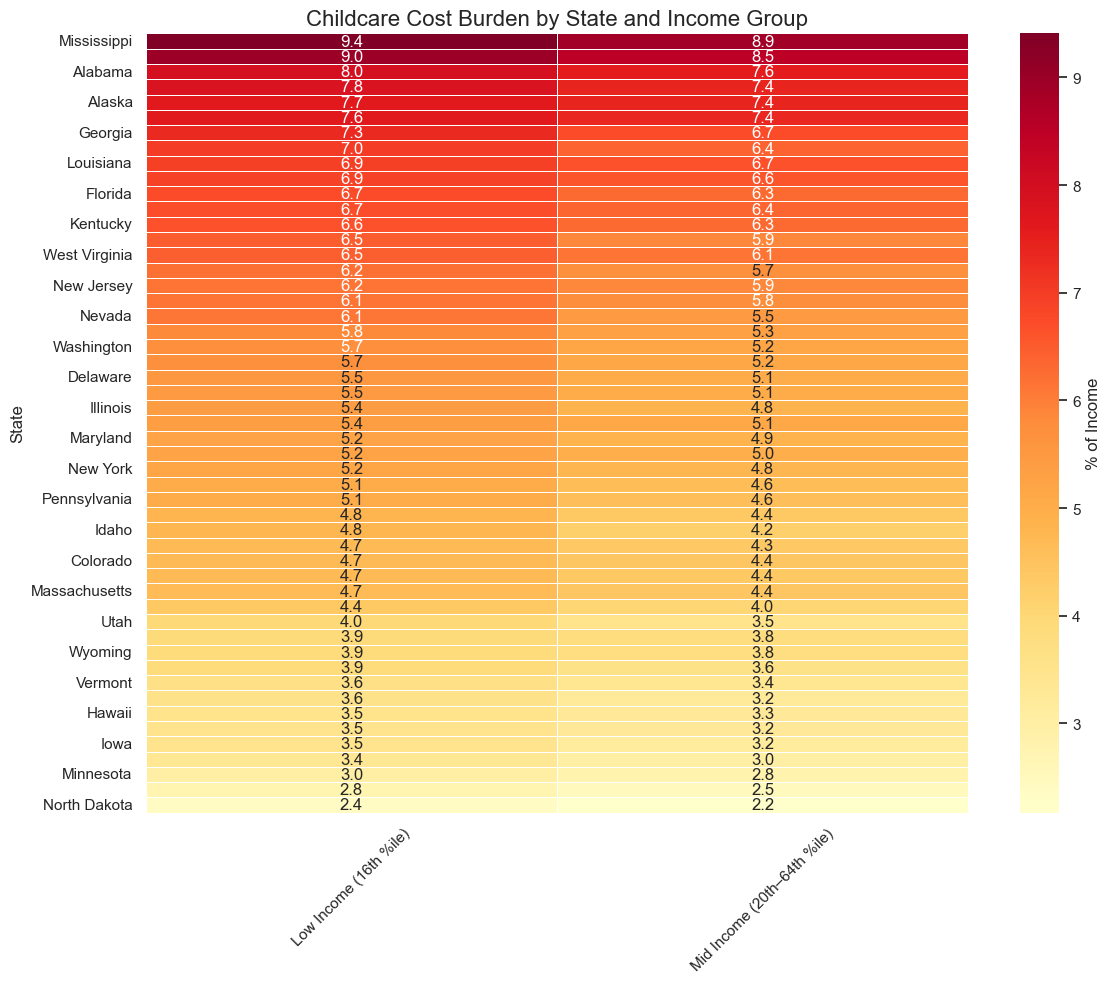

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter to latest year (or most recent available)
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year]

# Group by state and calculate average percentage of income spent
state_summary = df_latest.groupby('State_Name')[['FUNR_16', 'FUNR_20to64']].mean().reset_index()

# Rename for clarity
state_summary.columns = ['State', 'Low Income (16th %ile)', 'Mid Income (20th–64th %ile)']

# Melt to long format for heatmap structure
df_melt = state_summary.melt(id_vars='State', var_name='Income Group', value_name='% Income Spent')

# Pivot to wide format for heatmap
df_pivot = df_melt.pivot(index='State', columns='Income Group', values='% Income Spent')

# Sort by low-income burden
df_pivot = df_pivot.sort_values(by='Low Income (16th %ile)', ascending=False)

# Set plot style
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Create heatmap
ax = sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': '% of Income'})

# Titles and labels
plt.title('Childcare Cost Burden by State and Income Group', fontsize=16)
plt.xlabel('')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

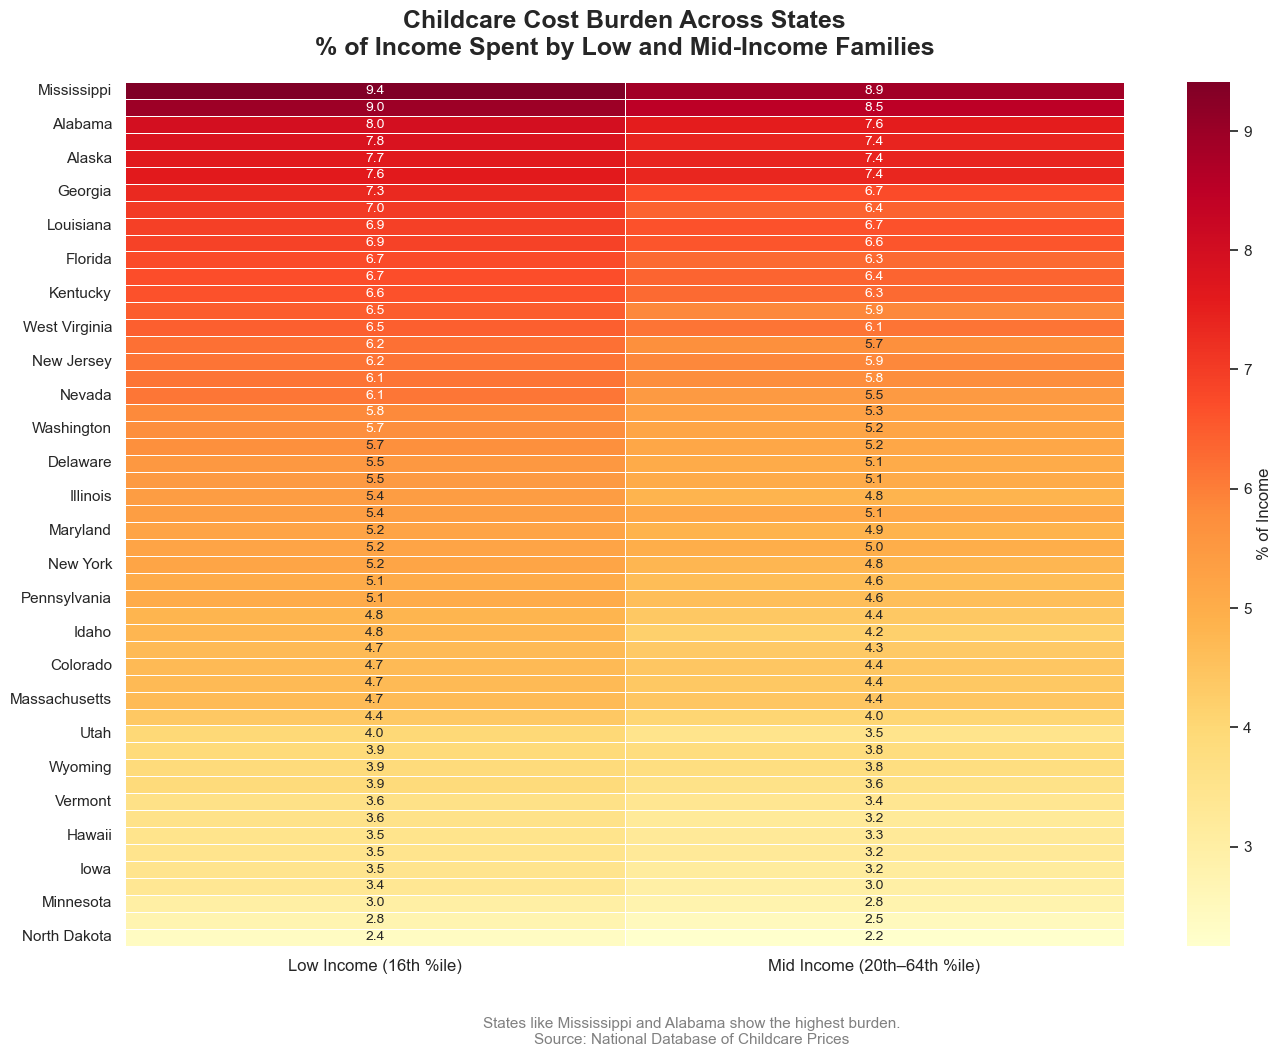

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create improved heatmap
ax = sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.6, linecolor='white',
                 cbar_kws={'label': '% of Income'}, annot_kws={"fontsize": 10}, square=False)

# Title & subtitle
plt.title("Childcare Cost Burden Across States\n% of Income Spent by Low and Mid-Income Families", fontsize=18, weight='bold', pad=20)

# Axis tweaks
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)

# Add bottom caption
plt.figtext(0.5, -0.05, "States like Mississippi and Alabama show the highest burden.\nSource: National Database of Childcare Prices", 
            wrap=True, horizontalalignment='center', fontsize=11, color="gray")

plt.tight_layout()
plt.show()

IndexingError: Too many indexers

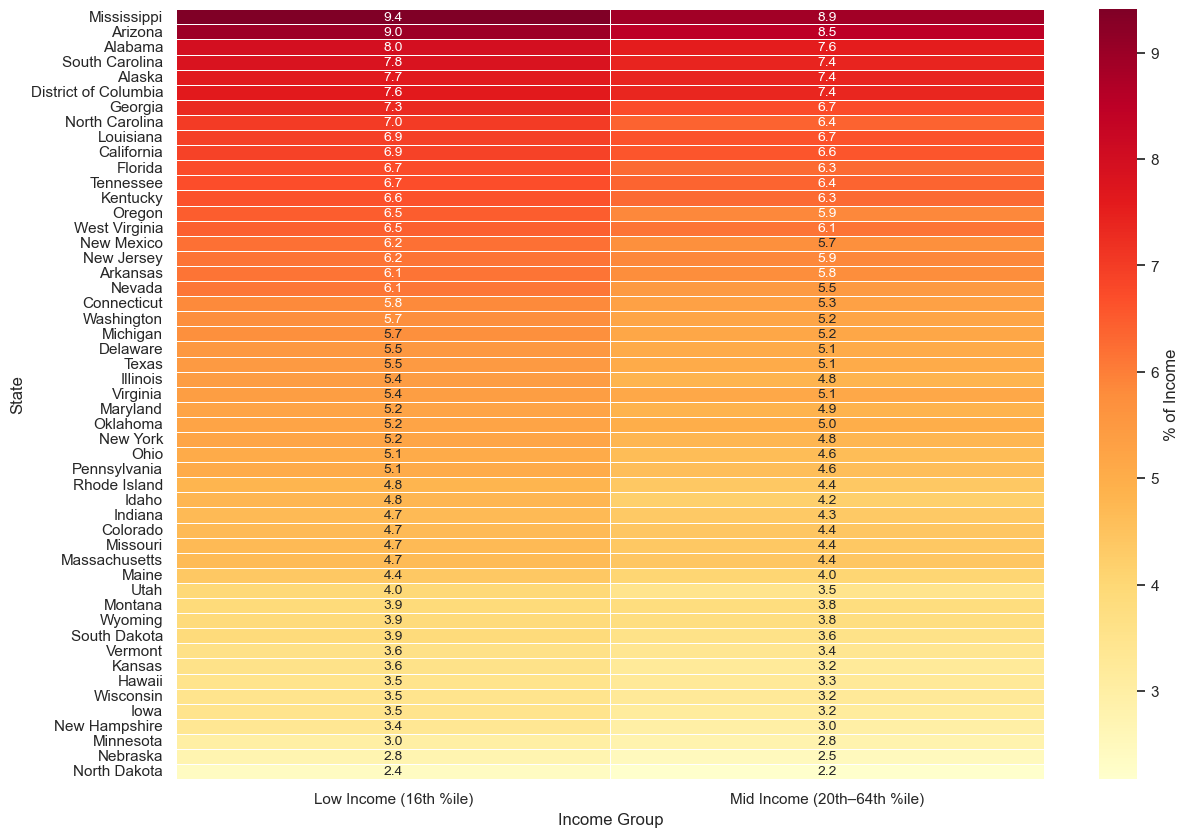

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Redefine color thresholds for white vs. black text
def get_text_colors(data, threshold=6):
    # Set white text for high values, black otherwise
    return np.where(data > threshold, "white", "black")

# Get annotation text colors
text_colors = df_pivot.apply(get_text_colors, axis=1)

# Build plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create heatmap with value-based text colors
ax = sns.heatmap(df_pivot,
                 annot=True,
                 fmt=".1f",
                 cmap="YlOrRd",
                 linewidths=0.6,
                 linecolor='white',
                 cbar_kws={'label': '% of Income'},
                 annot_kws={"fontsize": 10},
                 xticklabels=True,
                 yticklabels=True)

# Manually set each text annotation's color
for (y, x), val in np.ndenumerate(df_pivot.values):
    ax.text(x + 0.5, y + 0.5, f"{val:.1f}",
            ha='center', va='center',
            color=text_colors.iloc[y, x],
            fontsize=10)

# Titles and layout
plt.title("Childcare Cost Burden Across States\n% of Income Spent by Low and Mid-Income Families", 
          fontsize=18, weight='bold', pad=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)
plt.figtext(0.5, -0.05, "States like Mississippi and Alabama show the highest burden.\nSource: National Database of Childcare Prices", 
            wrap=True, horizontalalignment='center', fontsize=11, color="gray")

plt.tight_layout()
plt.show()

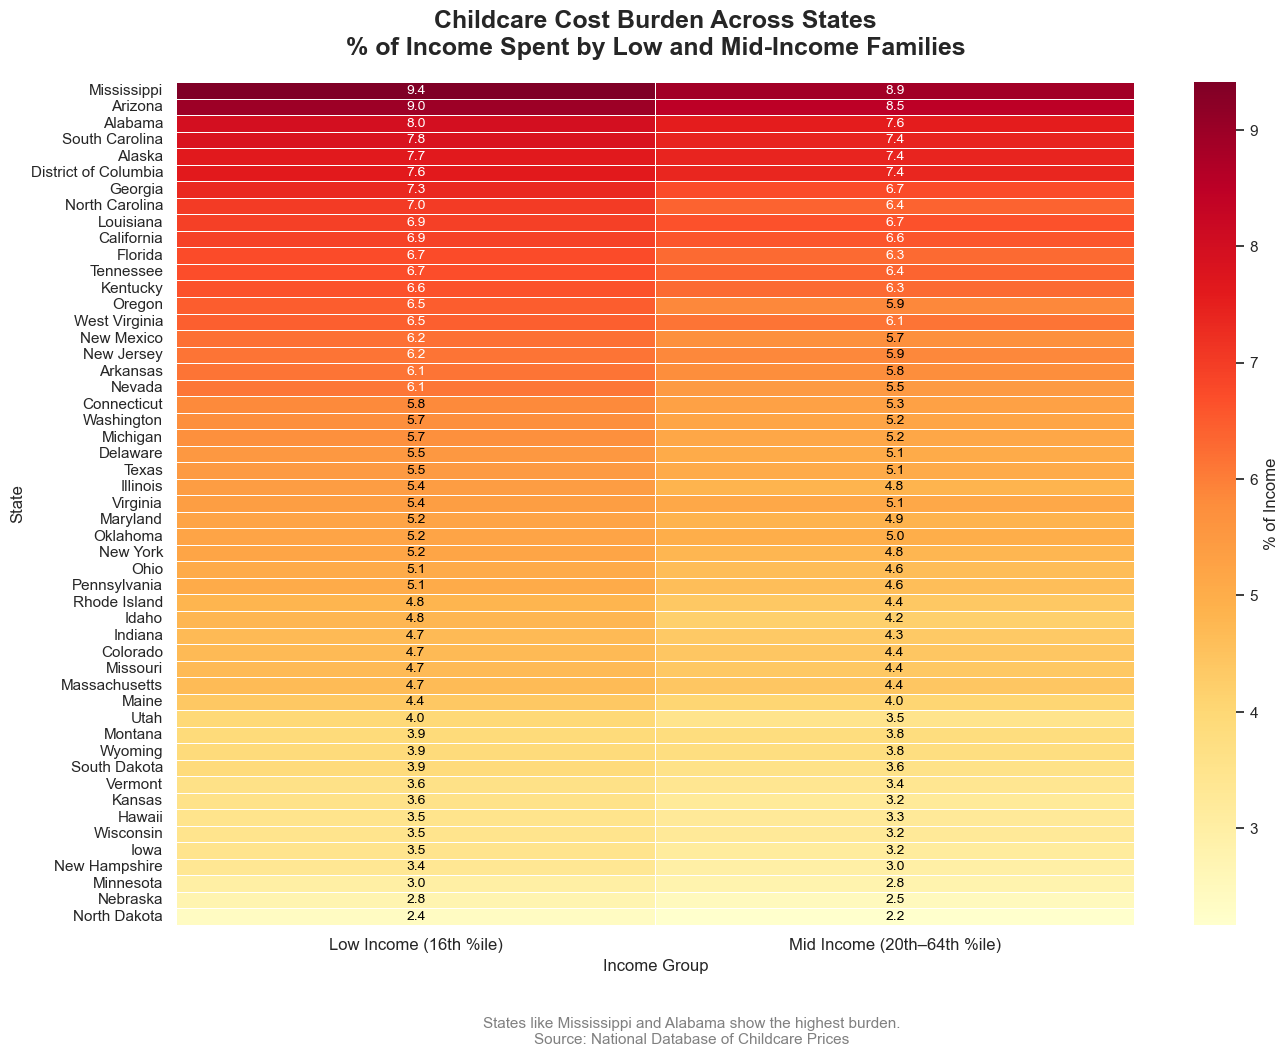

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Recalculate the heatmap to store cell values
data = df_pivot.values
threshold = 6  # Change threshold if needed

# Draw heatmap without annotations for now
ax = sns.heatmap(df_pivot, cmap="YlOrRd", linewidths=0.6, linecolor='white',
                 cbar_kws={'label': '% of Income'}, xticklabels=True, yticklabels=True)

# Manually annotate with contrasting text
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        val = data[y, x]
        text_color = 'white' if val > threshold else 'black'
        ax.text(x + 0.5, y + 0.5, f"{val:.1f}", ha='center', va='center',
                color=text_color, fontsize=10)

# Add titles and layout polish
plt.title("Childcare Cost Burden Across States\n% of Income Spent by Low and Mid-Income Families", 
          fontsize=18, weight='bold', pad=20)
plt.xlabel("Income Group")
plt.ylabel("State")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)
plt.figtext(0.5, -0.05, "States like Mississippi and Alabama show the highest burden.\nSource: National Database of Childcare Prices", 
            wrap=True, horizontalalignment='center', fontsize=11, color="gray")

plt.tight_layout()
plt.show()

In [18]:
# Save figure as high-resolution PNG
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Regenerate the heatmap for saving
ax = sns.heatmap(df_pivot, cmap="YlOrRd", linewidths=0.6, linecolor='white',
                 cbar_kws={'label': '% of Income'}, xticklabels=True, yticklabels=True)

# Annotate with dynamic text color
for y in range(df_pivot.shape[0]):
    for x in range(df_pivot.shape[1]):
        val = df_pivot.iloc[y, x]
        color = 'white' if val > 6 else 'black'
        ax.text(x + 0.5, y + 0.5, f"{val:.1f}", ha='center', va='center', color=color, fontsize=10)

# Titles and labels
plt.title("Childcare Cost Burden Across States\n% of Income Spent by Low and Mid-Income Families", fontsize=18, weight='bold', pad=20)
plt.xlabel("Income Group")
plt.ylabel("State")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)
plt.figtext(0.5, -0.05, "States like Mississippi and Alabama show the highest burden.\nSource: National Database of Childcare Prices",
            wrap=True, horizontalalignment='center', fontsize=11, color="gray")

plt.tight_layout()
plt.savefig("childcare_cost_heatmap.png", dpi=300, bbox_inches='tight')
plt.close()

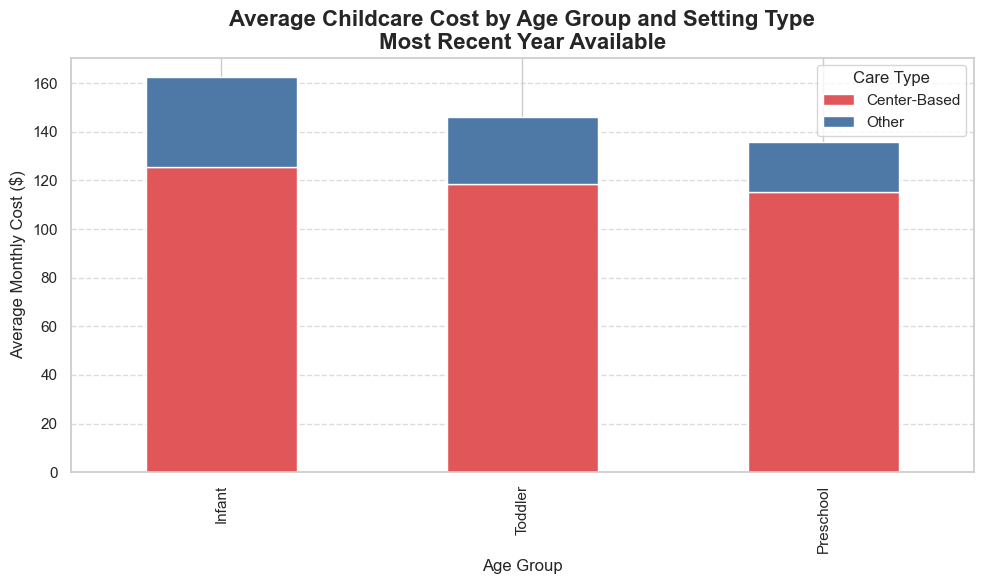

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to most recent year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year]

# Calculate national averages by care type and age group
data = {
    'Infant': {
        'Center-Based': df_latest['MFCCInfant'].mean(),
        'Other': df_latest['MCInfant'].mean() - df_latest['MFCCInfant'].mean()
    },
    'Toddler': {
        'Center-Based': df_latest['MFCCToddler'].mean(),
        'Other': df_latest['MCToddler'].mean() - df_latest['MFCCToddler'].mean()
    },
    'Preschool': {
        'Center-Based': df_latest['MFCCPreschool'].mean(),
        'Other': df_latest['MCPreschool'].mean() - df_latest['MFCCPreschool'].mean()
    }
}

# Create DataFrame for plotting
df_stacked = pd.DataFrame(data).T
df_stacked = df_stacked.fillna(0)

# Plot
df_stacked.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#e15759', '#4e79a7'])

# Titles and labels
plt.title('Average Childcare Cost by Age Group and Setting Type\nMost Recent Year Available', fontsize=16, weight='bold')
plt.ylabel('Average Monthly Cost ($)')
plt.xlabel('Age Group')
plt.legend(title='Care Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

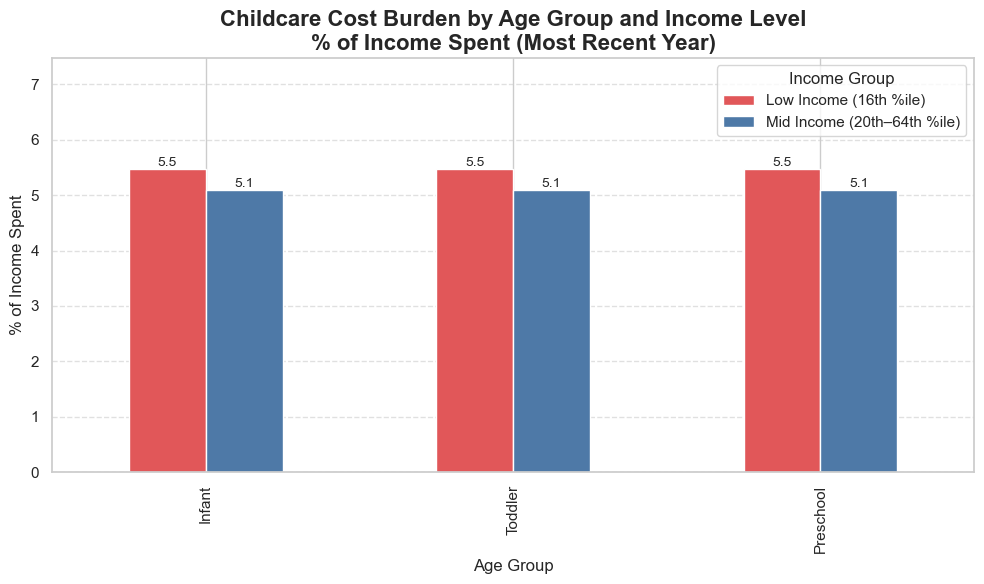

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Use latest year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year]

# Calculate average % of income spent by age group and income level
data = {
    'Infant': {
        'Low Income (16th %ile)': df_latest['FUNR_16'].mean(),
        'Mid Income (20th–64th %ile)': df_latest['FUNR_20to64'].mean()
    },
    'Toddler': {
        'Low Income (16th %ile)': df_latest['FUNR_16'].mean(),  # Repeat for now unless you have age-specific % fields
        'Mid Income (20th–64th %ile)': df_latest['FUNR_20to64'].mean()
    },
    'Preschool': {
        'Low Income (16th %ile)': df_latest['FUNR_16'].mean(),
        'Mid Income (20th–64th %ile)': df_latest['FUNR_20to64'].mean()
    }
}

# Format for plotting
df_disparity = pd.DataFrame(data).T
df_disparity = df_disparity.fillna(0)

# Plot
ax = df_disparity.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#e15759', '#4e79a7'])

# Titles and labels
plt.title('Childcare Cost Burden by Age Group and Income Level\n% of Income Spent (Most Recent Year)', fontsize=16, weight='bold')
plt.ylabel('% of Income Spent')
plt.xlabel('Age Group')
plt.ylim(0, max(df_disparity.max()) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Income Group', loc='upper right')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

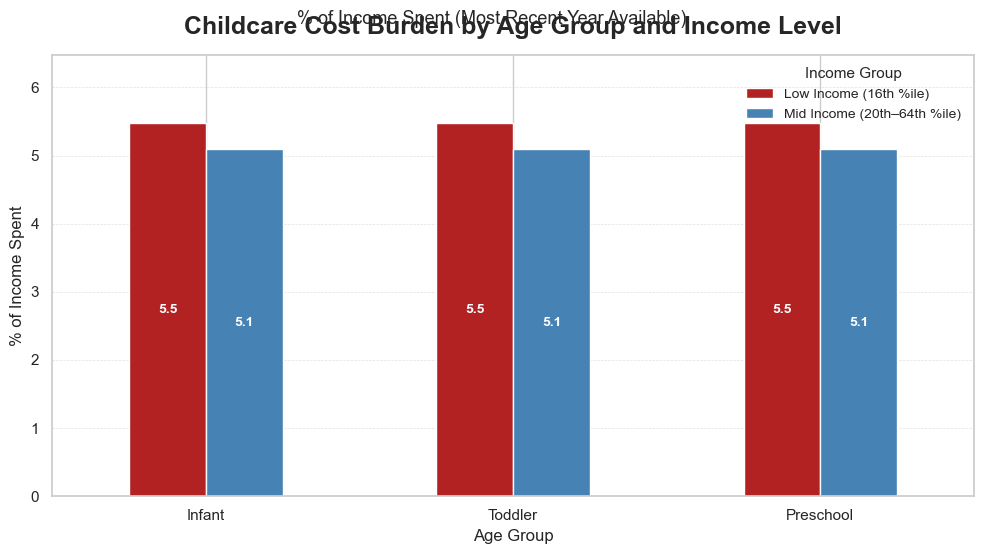

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Color palette (executive-friendly)
colors = ['#b22222', '#4682b4']  # dark red and steel blue

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df_disparity.plot(kind='bar', stacked=False, ax=ax, color=colors)

# Title & subtitle
plt.title("Childcare Cost Burden by Age Group and Income Level", fontsize=18, weight='bold', pad=15)
plt.suptitle("% of Income Spent (Most Recent Year Available)", fontsize=13, y=0.92)

# Axes labels
plt.ylabel("% of Income Spent", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

# Grid & limits
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.ylim(0, df_disparity.values.max() + 1)

# Legend
plt.legend(title="Income Group", loc='upper right', frameon=False, fontsize=10, title_fontsize=11)

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10, color='white', weight='bold')

# Final layout
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

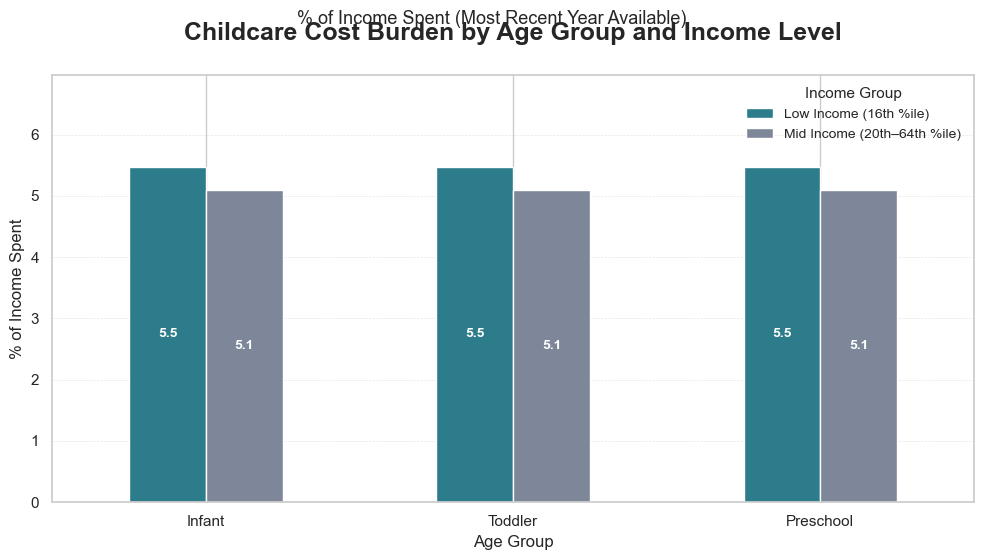

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Professional, neutral colors
colors = ['#2c7c8c', '#7d8799']  # teal + slate gray

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df_disparity.plot(kind='bar', stacked=False, ax=ax, color=colors)

# Title and subtitle with spacing
plt.title("Childcare Cost Burden by Age Group and Income Level", fontsize=18, weight='bold', pad=25)
plt.suptitle("% of Income Spent (Most Recent Year Available)", fontsize=13, y=0.93)

# Tight layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.90])

# Axes labels
plt.ylabel("% of Income Spent", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

# Grid & limits
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylim(0, df_disparity.values.max() + 1.5)

# Legend
plt.legend(title="Income Group", loc='upper right', frameon=False, fontsize=10, title_fontsize=11)

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10, color='white', weight='bold')

# Final spacing
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

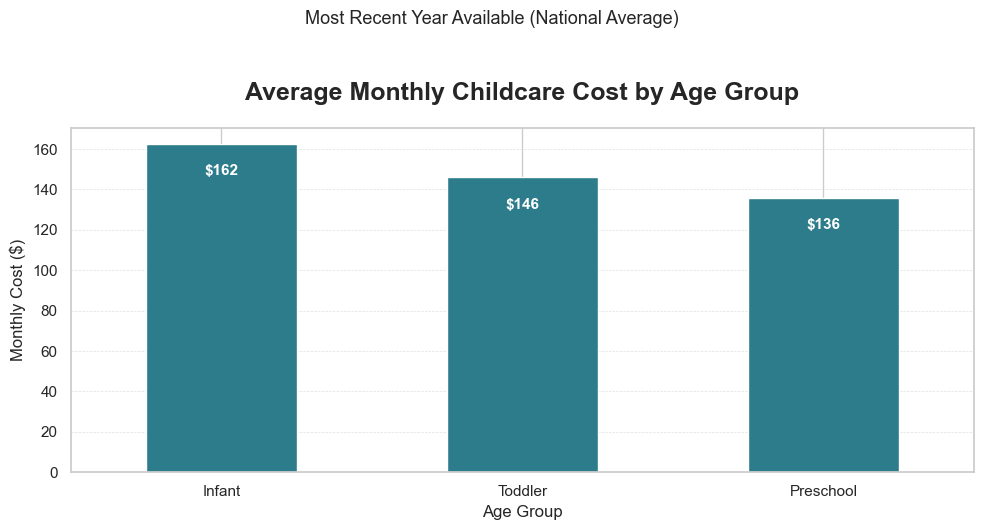

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to latest year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year]

# Pull national averages for each age group
avg_costs = {
    'Infant': df_latest['MCInfant'].mean(),
    'Toddler': df_latest['MCToddler'].mean(),
    'Preschool': df_latest['MCPreschool'].mean()
}

# Create DataFrame for plotting
df_costs = pd.DataFrame.from_dict(avg_costs, orient='index', columns=['Avg Monthly Cost'])
df_costs = df_costs.sort_values(by='Avg Monthly Cost', ascending=False)

# Plot
colors = ['#2c7c8c']  # teal tone
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_costs.plot(kind='bar', legend=False, ax=ax, color=colors)

# Title & layout
plt.title("Average Monthly Childcare Cost by Age Group", fontsize=18, weight='bold', pad=20)
plt.suptitle("Most Recent Year Available (National Average)", fontsize=13, y=0.91)
plt.ylabel("Monthly Cost ($)", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

# Add data labels
for i, value in enumerate(df_costs['Avg Monthly Cost']):
    ax.text(i, value - 10, f"${value:.0f}", ha='center', va='top', fontsize=11, color='white', weight='bold')

# Grid + styling
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

In [32]:
fig.savefig("average_childcare_cost_by_agegroup.png", dpi=300, bbox_inches='tight')

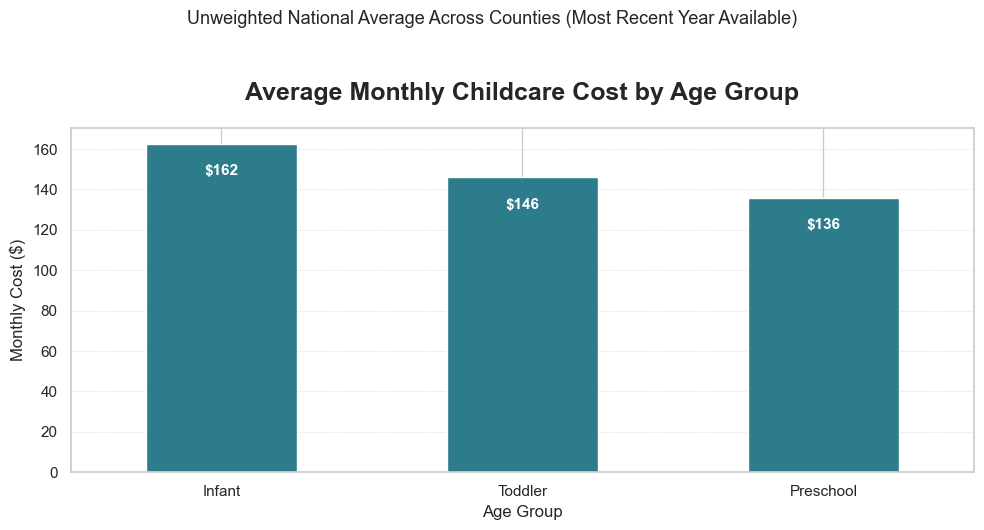

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to latest year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year]

# Pull national averages for each age group
avg_costs = {
    'Infant': df_latest['MCInfant'].mean(),
    'Toddler': df_latest['MCToddler'].mean(),
    'Preschool': df_latest['MCPreschool'].mean()
}

# Create DataFrame
df_costs = pd.DataFrame.from_dict(avg_costs, orient='index', columns=['Avg Monthly Cost'])
df_costs = df_costs.sort_values(by='Avg Monthly Cost', ascending=False)

# Define colors
colors = ['#2c7c8c']  # Teal tone

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_costs.plot(kind='bar', ax=ax, legend=False, color=colors)

# Title and subtitle (updated)
plt.title("Average Monthly Childcare Cost by Age Group", fontsize=18, weight='bold', pad=20)
plt.suptitle("Unweighted National Average Across Counties (Most Recent Year Available)", 
             fontsize=13, y=0.91)

# Axis labels
plt.ylabel("Monthly Cost ($)", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(rotation=0)

# Add white bar labels
for i, value in enumerate(df_costs['Avg Monthly Cost']):
    ax.text(i, value - 10, f"${value:.0f}", ha='center', va='top', fontsize=11, color='white', weight='bold')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.88])

# Save high-resolution PNG
fig.savefig("average_childcare_cost_by_agegroup.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

In [36]:
df_latest.columns.tolist()

['State_Name',
 'State_Abbreviation',
 'County_Name',
 'County_FIPS_Code',
 'StudyYear',
 'UNR_16',
 'FUNR_16',
 'MUNR_16',
 'UNR_20to64',
 'FUNR_20to64',
 'MUNR_20to64',
 'FLFPR_20to64',
 'FLFPR_20to64_Under6',
 'FLFPR_20to64_6to17',
 'FLFPR_20to64_Under6_6to17',
 'MLFPR_20to64',
 'PR_F',
 'PR_P',
 'MHI',
 'ME',
 'FME',
 'MME',
 'MHI_2018',
 'ME_2018',
 'FME_2018',
 'MME_2018',
 'TotalPop',
 'OneRace',
 'OneRace_W',
 'OneRace_B',
 'OneRace_I',
 'OneRace_A',
 'OneRace_H',
 'OneRace_Other',
 'TwoRaces',
 'Hispanic',
 'Households',
 'H_Under6_BothWork',
 'H_Under6_FWork',
 'H_Under6_MWork',
 'H_Under6_SingleM',
 'H_6to17_BothWork',
 'H_6to17_Fwork',
 'H_6to17_Mwork',
 'H_6to17_SingleM',
 'EMP_M',
 'MEMP_M',
 'FEMP_M',
 'EMP_Service',
 'MEMP_Service',
 'FEMP_Service',
 'EMP_Sales',
 'MEMP_Sales',
 'FEMP_Sales',
 'EMP_N',
 'MEMP_N',
 'FEMP_N',
 'EMP_P',
 'MEMP_P',
 'FEMP_P',
 'iUNR_16',
 'iFUNR_16',
 'iMUNR_16',
 'iUNR_20to64',
 'iFUNR_20to64',
 'iMUNR_20to64',
 'iFLFPR_20to64',
 'iFLFPR_2

In [40]:
# Load centroid coordinates from a verified source
fips_url = 'https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv'
df_coords = pd.read_csv(fips_url)

# Preview
df_coords.head()

fips            name state
0     0   UNITED STATES   NaN
1  1000         ALABAMA   NaN
2  1001  Autauga County    AL
3  1003  Baldwin County    AL
4  1005  Barbour County    AL

In [42]:
# Ensure matching formats for FIPS
df_coords['fips'] = df_coords['fips'].astype(str).str.zfill(5)
df_latest['County_FIPS_Code'] = df_latest['County_FIPS_Code'].astype(str).str.zfill(5)

# Merge by FIPS
df_map = pd.merge(df_latest, df_coords, left_on='County_FIPS_Code', right_on='fips', how='inner')

# Drop missing values for plotting
df_map = df_map[df_map['MCInfant'].notna()]

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_12819/3458489967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['County_FIPS_Code'] = df_latest['County_FIPS_Code'].astype(str).str.zfill(5)


In [46]:
df_map.columns.tolist()

['State_Name',
 'State_Abbreviation',
 'County_Name',
 'County_FIPS_Code',
 'StudyYear',
 'UNR_16',
 'FUNR_16',
 'MUNR_16',
 'UNR_20to64',
 'FUNR_20to64',
 'MUNR_20to64',
 'FLFPR_20to64',
 'FLFPR_20to64_Under6',
 'FLFPR_20to64_6to17',
 'FLFPR_20to64_Under6_6to17',
 'MLFPR_20to64',
 'PR_F',
 'PR_P',
 'MHI',
 'ME',
 'FME',
 'MME',
 'MHI_2018',
 'ME_2018',
 'FME_2018',
 'MME_2018',
 'TotalPop',
 'OneRace',
 'OneRace_W',
 'OneRace_B',
 'OneRace_I',
 'OneRace_A',
 'OneRace_H',
 'OneRace_Other',
 'TwoRaces',
 'Hispanic',
 'Households',
 'H_Under6_BothWork',
 'H_Under6_FWork',
 'H_Under6_MWork',
 'H_Under6_SingleM',
 'H_6to17_BothWork',
 'H_6to17_Fwork',
 'H_6to17_Mwork',
 'H_6to17_SingleM',
 'EMP_M',
 'MEMP_M',
 'FEMP_M',
 'EMP_Service',
 'MEMP_Service',
 'FEMP_Service',
 'EMP_Sales',
 'MEMP_Sales',
 'FEMP_Sales',
 'EMP_N',
 'MEMP_N',
 'FEMP_N',
 'EMP_P',
 'MEMP_P',
 'FEMP_P',
 'iUNR_16',
 'iFUNR_16',
 'iMUNR_16',
 'iUNR_20to64',
 'iFUNR_20to64',
 'iMUNR_20to64',
 'iFLFPR_20to64',
 'iFLFPR_2

In [48]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
import geopandas as gpd

# Load county geometries from U.S. Census
geo_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
gdf = gpd.read_file(geo_url)

In [52]:
# Ensure FIPS codes match formatting for the merge
df_latest['County_FIPS_Code'] = df_latest['County_FIPS_Code'].astype(str).str.zfill(5)
gdf['id'] = gdf['id'].astype(str).str.zfill(5)

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_12819/547924816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['County_FIPS_Code'] = df_latest['County_FIPS_Code'].astype(str).str.zfill(5)


In [54]:
# Merge geometry with childcare costs using FIPS
geo_df = gdf.merge(df_latest, left_on='id', right_on='County_FIPS_Code', how='left')

# Filter out counties without cost data
geo_df = geo_df[geo_df['MCInfant'].notna()]

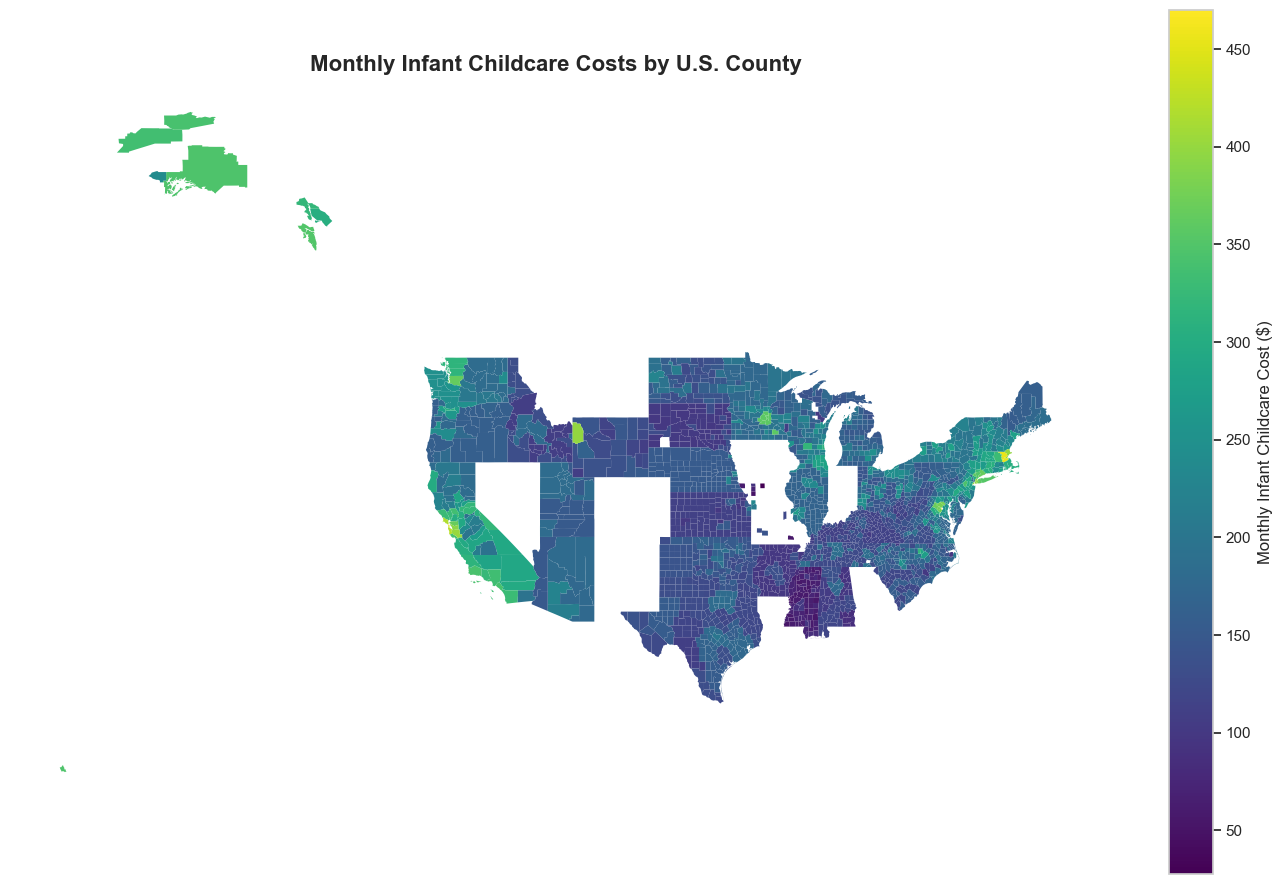

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(14, 9))

geo_df.plot(column='MCInfant',
             cmap='viridis',
             linewidth=0,
             ax=ax,
             edgecolor='0.8',
             legend=True,
             legend_kwds={'label': "Monthly Infant Childcare Cost ($)",
                          'orientation': "vertical"})

# Titles and styling
ax.set_title("Monthly Infant Childcare Costs by U.S. County", fontsize=16, weight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()

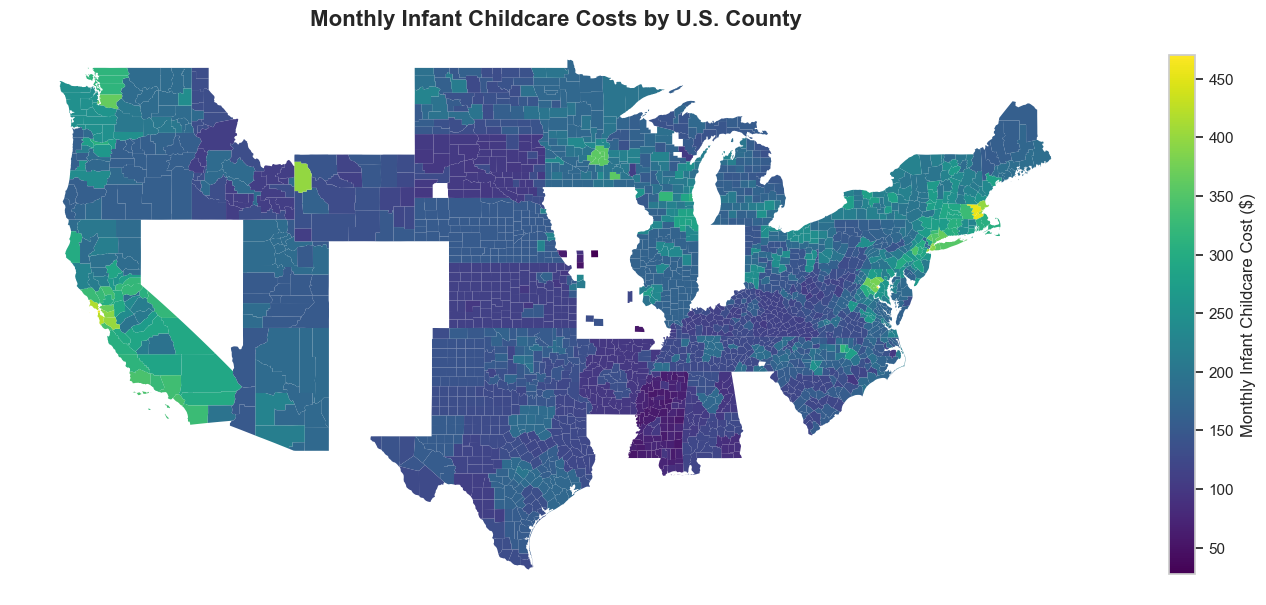

In [60]:
# Filter out Alaska and Hawaii properly using existing column name
geo_plot = geo_df[~geo_df['State_Abbreviation'].isin(['AK', 'HI'])]

# Plot the cleaned map
fig, ax = plt.subplots(1, 1, figsize=(14, 9))

geo_plot.plot(
    column='MCInfant',
    cmap='viridis',
    linewidth=0,
    ax=ax,
    edgecolor='0.3',
    legend=True,
    legend_kwds={
        'label': "Monthly Infant Childcare Cost ($)",
        'orientation': "vertical",
        'shrink': 0.6
    }
)

# Styling
ax.set_title("Monthly Infant Childcare Costs by U.S. County", fontsize=16, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [62]:
fig.savefig("monthly_infant_childcare_costs_cleaned_map.png", dpi=300, bbox_inches='tight')

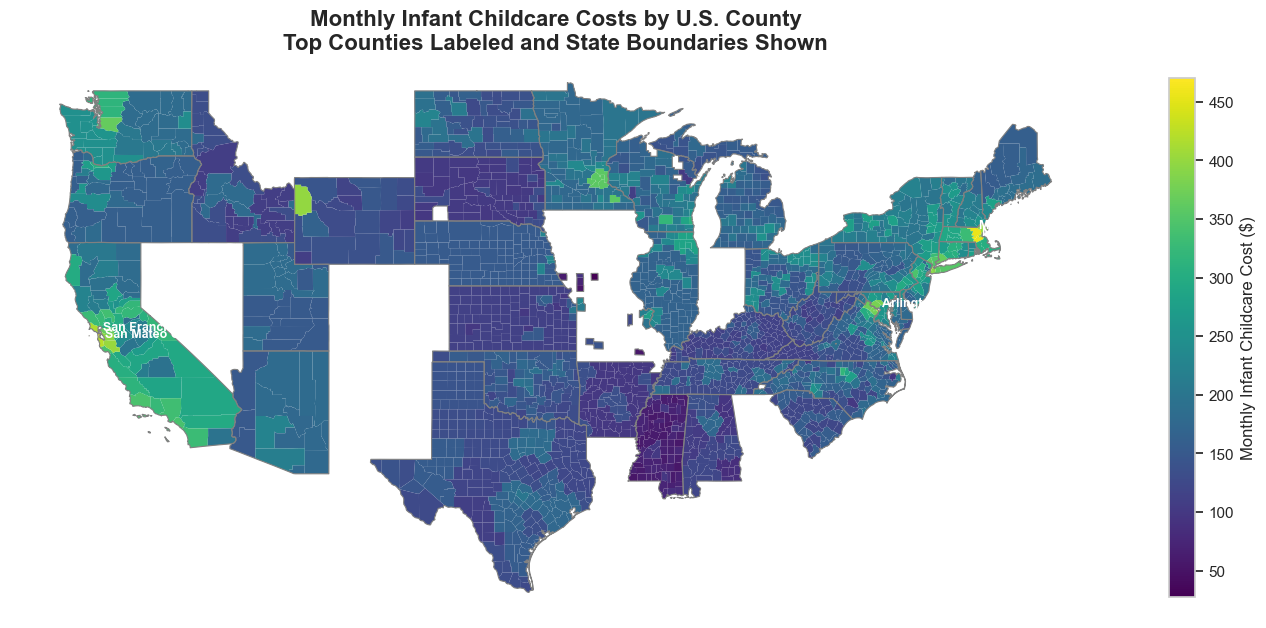

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter to contiguous U.S.
geo_plot = geo_df[~geo_df['State_Abbreviation'].isin(['AK', 'HI'])]

# Get state outlines
states_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
gdf_states = geo_plot.dissolve(by='State_Abbreviation')

# Find top 5 counties for annotations
top_counties = geo_plot[['County_Name', 'MCInfant', 'geometry']].sort_values('MCInfant', ascending=False).head(5)

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(14, 9))

# Choropleth
geo_plot.plot(
    column='MCInfant',
    cmap='viridis',
    linewidth=0,
    ax=ax,
    edgecolor='0.3',
    legend=True,
    legend_kwds={
        'label': "Monthly Infant Childcare Cost ($)",
        'orientation': "vertical",
        'shrink': 0.6
    }
)

# Add state boundaries
gdf_states.boundary.plot(ax=ax, linewidth=0.8, color='gray')

# Annotate top 5 counties
for idx, row in top_counties.iterrows():
    ax.annotate(
        text=row['County_Name'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=(3, 3),
        textcoords='offset points',
        fontsize=9,
        color='white',
        weight='bold'
    )

# Titles
ax.set_title("Monthly Infant Childcare Costs by U.S. County\nTop Counties Labeled and State Boundaries Shown",
             fontsize=16, weight='bold')
ax.set_axis_off()
plt.tight_layout()

# Save
fig.savefig("monthly_infant_childcare_costs_with_boundaries_annotated.png", dpi=300, bbox_inches='tight')
plt.show()

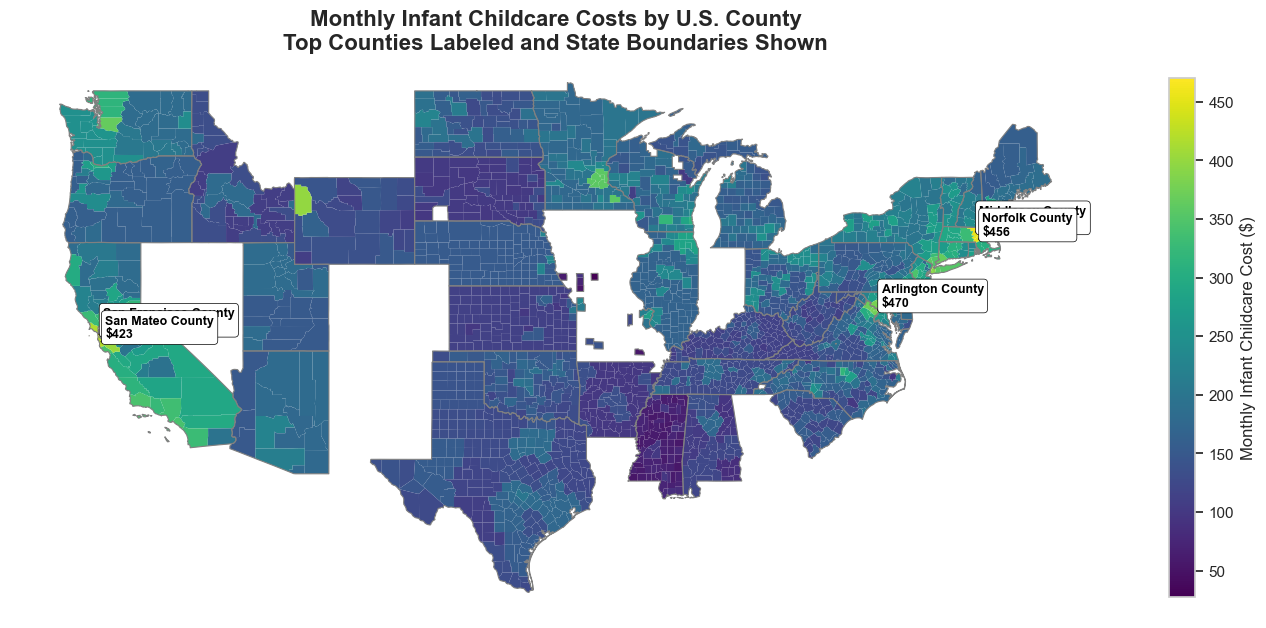

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter to contiguous U.S.
geo_plot = geo_df[~geo_df['State_Abbreviation'].isin(['AK', 'HI'])]

# Get state outlines
gdf_states = geo_plot.dissolve(by='State_Abbreviation')

# Find top 5 counties for annotations
top_counties = geo_plot[['County_Name', 'MCInfant', 'geometry']].sort_values('MCInfant', ascending=False).head(5)

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(14, 9))

# Choropleth
geo_plot.plot(
    column='MCInfant',
    cmap='viridis',
    linewidth=0,
    ax=ax,
    edgecolor='0.3',
    legend=True,
    legend_kwds={
        'label': "Monthly Infant Childcare Cost ($)",
        'orientation': "vertical",
        'shrink': 0.6
    }
)

# Add state boundaries
gdf_states.boundary.plot(ax=ax, linewidth=0.8, color='gray')

# Annotate top 5 counties with styled arrows and text boxes
for idx, row in top_counties.iterrows():
    ax.annotate(
        text=f"{row['County_Name']}\n${row['MCInfant']:,.0f}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=(3, 3),
        textcoords='offset points',
        fontsize=9,
        color='black',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5),
        arrowprops=dict(
            arrowstyle='->',
            color='black',
            lw=1,
            shrinkA=5,
            shrinkB=5,
            connectionstyle="arc3,rad=0.2"
        )
    )

# Titles
ax.set_title("Monthly Infant Childcare Costs by U.S. County\nTop Counties Labeled and State Boundaries Shown",
             fontsize=16, weight='bold')
ax.set_axis_off()
plt.tight_layout()

# Save
fig.savefig("monthly_infant_childcare_costs_with_boundaries_annotated.png", dpi=300, bbox_inches='tight')
plt.show()

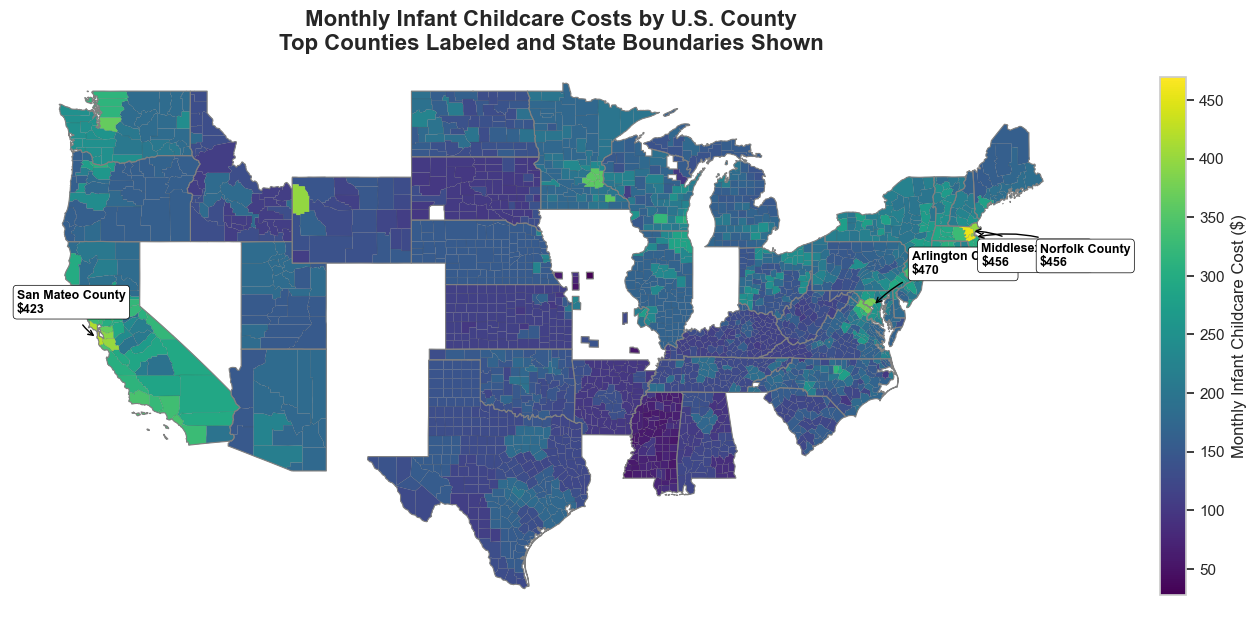

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot with improved annotations
fig, ax = plt.subplots(1, 1, figsize=(14, 9))

geo_plot.plot(
    column='MCInfant',
    cmap='viridis',
    linewidth=0.1,
    ax=ax,
    edgecolor='0.3',
    legend=True,
    legend_kwds={
        'label': "Monthly Infant Childcare Cost ($)",
        'orientation': "vertical",
        'shrink': 0.6
    }
)

# Add state outlines
gdf_states = geo_plot.dissolve(by='State_Abbreviation', as_index=False)
gdf_states.boundary.plot(ax=ax, linewidth=0.8, color='gray')

# Annotate top 5 counties clearly
annotation_coords = [
    {'county': 'San Mateo County', 'xytext': (-60, 20)},
    {'county': 'Arlington County', 'xytext': (30, 25)},
    {'county': 'Norfolk County', 'xytext': (50, -20)},
    {'county': 'Middlesex County', 'xytext': (10, -25)},
    {'county': 'New York County', 'xytext': (40, 10)}
]

for idx, row in top_counties.iterrows():
    custom = next((item for item in annotation_coords if item['county'] == row['County_Name']), None)
    if custom:
        ax.annotate(
            text=f"{row['County_Name']}\n${row['MCInfant']:,.0f}",
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            xytext=custom['xytext'],
            textcoords='offset points',
            fontsize=9,
            color='black',
            weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5),
            arrowprops=dict(
                arrowstyle='->',
                color='black',
                lw=1,
                shrinkA=5,
                shrinkB=5,
                connectionstyle="arc3,rad=0.2"
            )
        )

# Title & formatting
ax.set_title("Monthly Infant Childcare Costs by U.S. County\nTop Counties Labeled and State Boundaries Shown", fontsize=16, weight='bold')
ax.set_axis_off()
plt.tight_layout()

# Save the finalized image
fig.savefig("monthly_infant_childcare_costs_with_boundaries_annotated.png", dpi=300, bbox_inches='tight')
plt.show()

In [78]:
print(geo_df.columns.tolist())

['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry', 'State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code', 'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64', 'FUNR_20to64', 'MUNR_20to64', 'FLFPR_20to64', 'FLFPR_20to64_Under6', 'FLFPR_20to64_6to17', 'FLFPR_20to64_Under6_6to17', 'MLFPR_20to64', 'PR_F', 'PR_P', 'MHI', 'ME', 'FME', 'MME', 'MHI_2018', 'ME_2018', 'FME_2018', 'MME_2018', 'TotalPop', 'OneRace', 'OneRace_W', 'OneRace_B', 'OneRace_I', 'OneRace_A', 'OneRace_H', 'OneRace_Other', 'TwoRaces', 'Hispanic', 'Households', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 'H_6to17_Mwork', 'H_6to17_SingleM', 'EMP_M', 'MEMP_M', 'FEMP_M', 'EMP_Service', 'MEMP_Service', 'FEMP_Service', 'EMP_Sales', 'MEMP_Sales', 'FEMP_Sales', 'EMP_N', 'MEMP_N', 'FEMP_N', 'EMP_P', 'MEMP_P', 'FEMP_P', 'iUNR_16', 'iFUNR_16', 'iMUNR_16', 'iUNR_20to64', 'iFUNR_20to64', 'iMUNR_20to64', 'iFLFPR_20to64',

In [80]:
# Filter out Alaska (02) and Hawaii (15) using numeric FIPS state codes
geo_df_cleaned = geo_df[~geo_df['STATE'].isin([2, 15])].copy()

In [82]:
df_map['lon'] = geo_df_cleaned.geometry.centroid.x
df_map['lat'] = geo_df_cleaned.geometry.centroid.y

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_12819/1206854740.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_map['lon'] = geo_df_cleaned.geometry.centroid.x
/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_12819/1206854740.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_map['lat'] = geo_df_cleaned.geometry.centroid.y


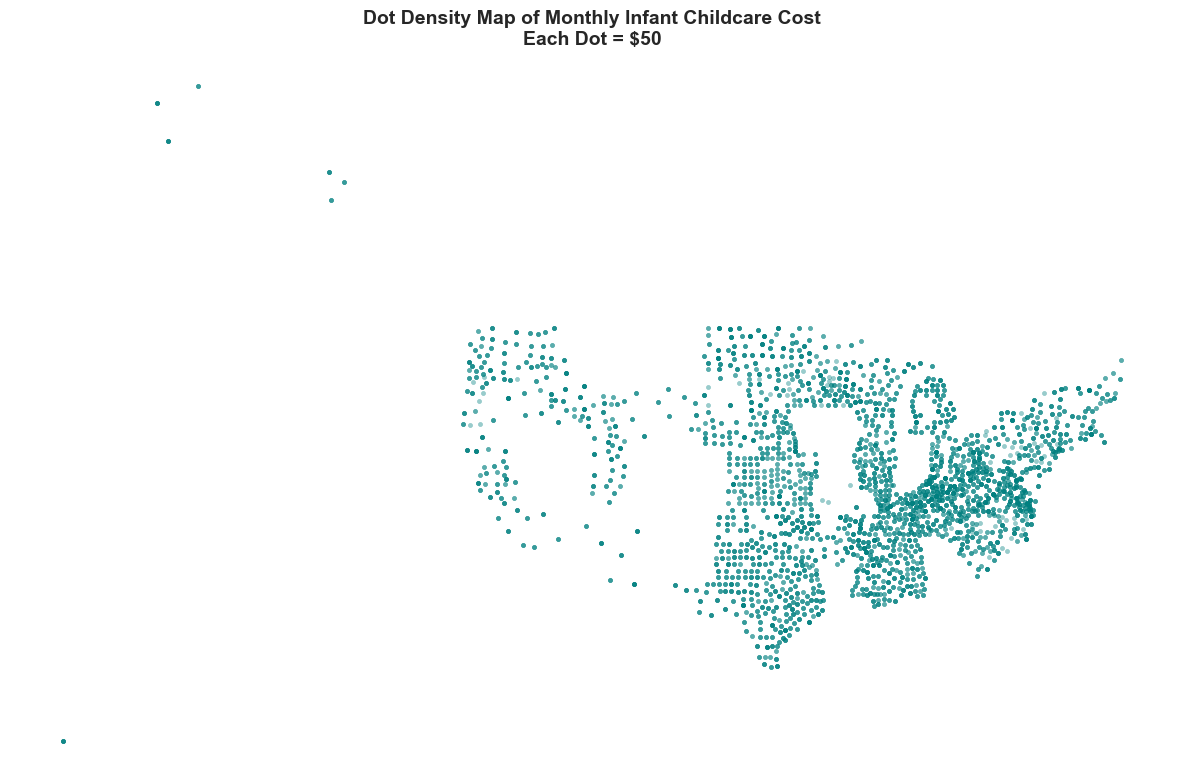

In [84]:
dots_df = df_map[['lon', 'lat', 'MCInfant']].dropna().copy()
dots_df['dots'] = (dots_df['MCInfant'] / 50).round().astype(int)
dots_expanded = dots_df.loc[dots_df.index.repeat(dots_df['dots'])].reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='lon', y='lat', data=dots_expanded,
    s=10, alpha=0.4, color='teal', edgecolor=None
)
plt.title("Dot Density Map of Monthly Infant Childcare Cost\nEach Dot = $50", fontsize=14, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig("dot_density_infant_costs_weighted.png", dpi=300, bbox_inches='tight')
plt.show()

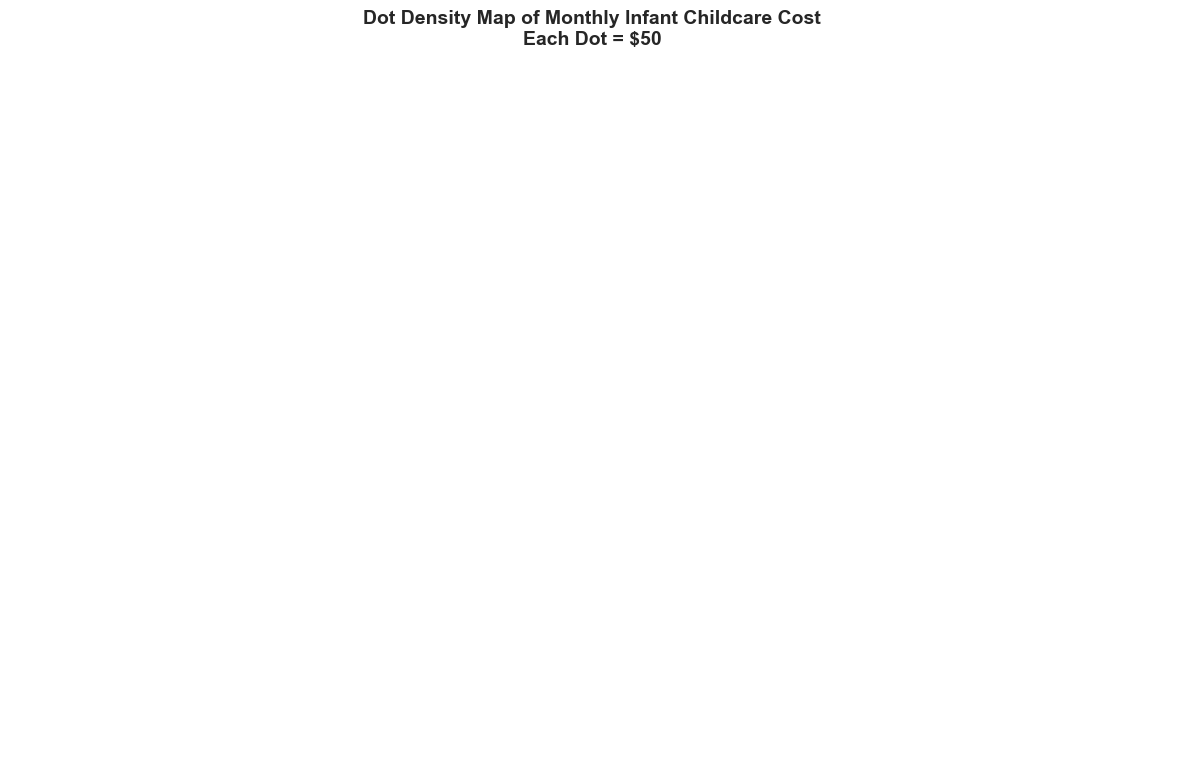

In [92]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Set dot value and cost column
dot_value = 50  # Each dot = $50
cost_column = 'MCInfant'

# STEP 2: Use already cleaned and merged GeoDataFrame with geometries
# (assuming it's called geo_df and has 'geometry' and MCInfant)
# Reproject to planar CRS for accurate centroids
geo_df_proj = geo_df.to_crs(epsg=3857)  # Web Mercator projection

# STEP 3: Create centroid coordinates for plotting
geo_df_proj['lon'] = geo_df_proj.geometry.centroid.x
geo_df_proj['lat'] = geo_df_proj.geometry.centroid.y

# STEP 4: Generate dots proportional to cost
dots_df = geo_df_proj[['lon', 'lat', cost_column]].dropna().copy()
dots_df['dots'] = (dots_df[cost_column] / dot_value).round().astype(int)
dots_expanded = dots_df.loc[dots_df.index.repeat(dots_df['dots'])].reset_index(drop=True)

# STEP 5: Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x='lon', y='lat',
    data=dots_expanded,
    s=10, alpha=0.4, color='teal',
    edgecolor=None, ax=ax
)
ax.set_title("Dot Density Map of Monthly Infant Childcare Cost\nEach Dot = $50", fontsize=14, weight='bold')
ax.set_axis_off()
plt.tight_layout()

# STEP 6: Save image
fig.savefig("dot_density_infant_costs_weighted_fixed.png", dpi=300, bbox_inches='tight')
plt.show()

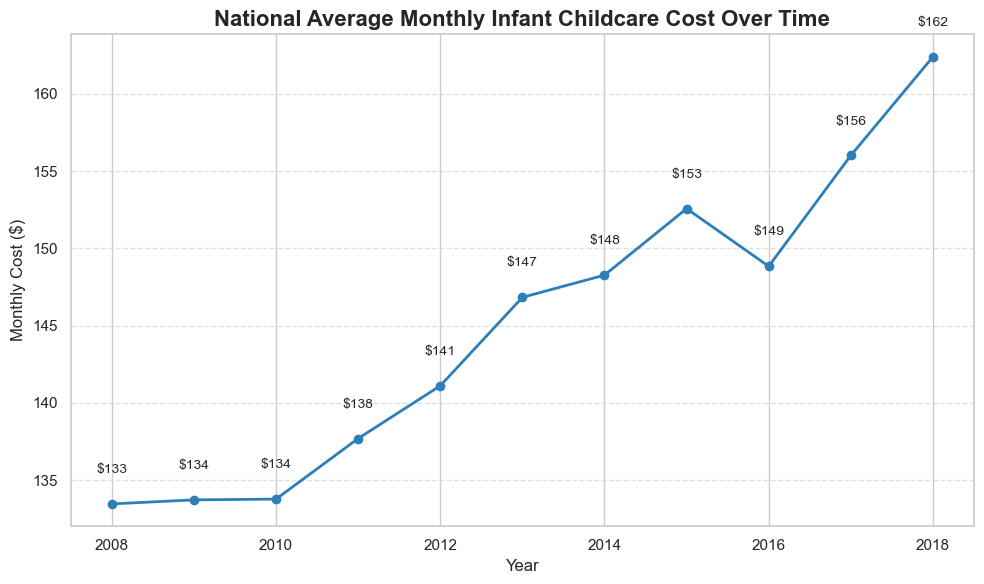

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full Excel dataset
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name="nationaldatabaseofchildcare")

# Filter for valid infant cost values
df_clean = df[['StudyYear', 'MCInfant']].dropna()

# Group by year and calculate the national average
avg_cost_by_year = df_clean.groupby('StudyYear')['MCInfant'].mean().round(2)

# Plotting
colors = "#2c7fb8"  # clean professional blue
fig, ax = plt.subplots(figsize=(10, 6))
avg_cost_by_year.plot(ax=ax, color=colors, marker='o', linewidth=2)

# Title and labels
ax.set_title("National Average Monthly Infant Childcare Cost Over Time", fontsize=16, weight='bold')
ax.set_ylabel("Monthly Cost ($)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

# Annotate each point
for year, cost in avg_cost_by_year.items():
    ax.text(year, cost + 2, f"${cost:.0f}", ha='center', fontsize=10)

# Style grid
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the figure
fig.savefig("national_avg_infant_cost_over_time.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

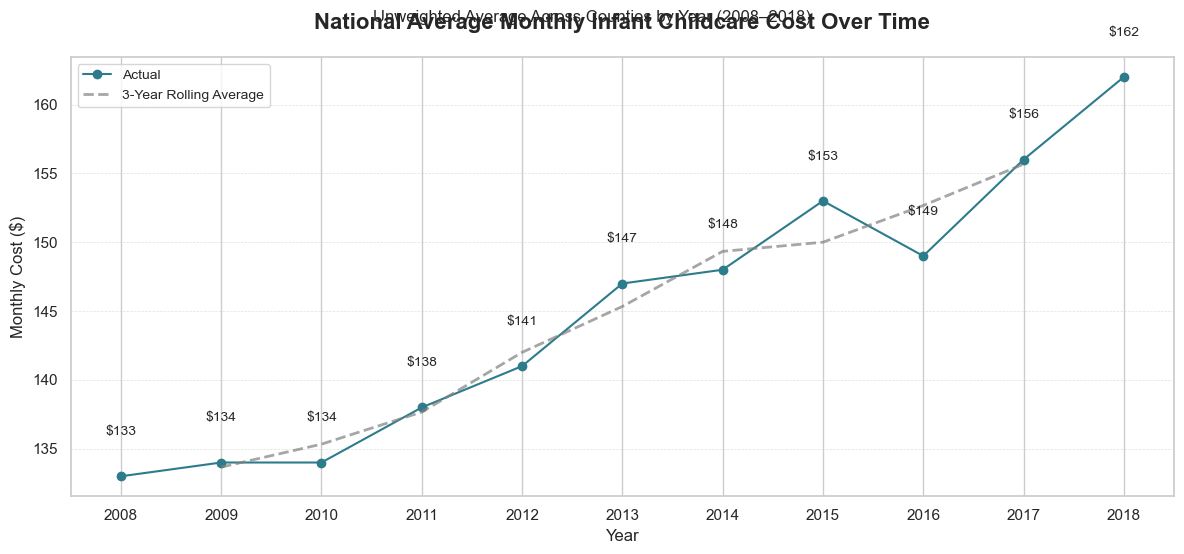

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare national average data by year
avg_cost_by_year = {
    2008: 133, 2009: 134, 2010: 134,
    2011: 138, 2012: 141, 2013: 147,
    2014: 148, 2015: 153, 2016: 149,
    2017: 156, 2018: 162
}

# Convert to DataFrame
df_trend = pd.DataFrame(list(avg_cost_by_year.items()), columns=['Year', 'Monthly Cost ($)'])

# Calculate rolling average for smoothed trendline
df_trend['Smoothed'] = df_trend['Monthly Cost ($)'].rolling(window=3, center=True).mean()

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Main line
ax.plot(df_trend['Year'], df_trend['Monthly Cost ($)'], marker='o', color='#2c7c8c', label='Actual')

# Smoothed trendline
ax.plot(df_trend['Year'], df_trend['Smoothed'], linestyle='--', linewidth=2, color='gray', alpha=0.7, label='3-Year Rolling Average')

# Add title and subtitle
ax.set_title("National Average Monthly Infant Childcare Cost Over Time", fontsize=16, weight='bold', pad=20)
plt.suptitle("Unweighted Average Across Counties by Year (2008–2018)", fontsize=12, y=0.92)

# Axes labels
ax.set_ylabel("Monthly Cost ($)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

# Data labels above points
for x, y in zip(df_trend['Year'], df_trend['Monthly Cost ($)']):
    ax.text(x, y + 3, f"${y}", ha='center', fontsize=10)

# Grid and layout
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_xticks(df_trend['Year'])
plt.xticks(rotation=0)
ax.legend(loc='upper left', fontsize=10)
plt.tight_layout()

# Save high-res
fig.savefig("national_avg_infant_cost_over_time_smoothed.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

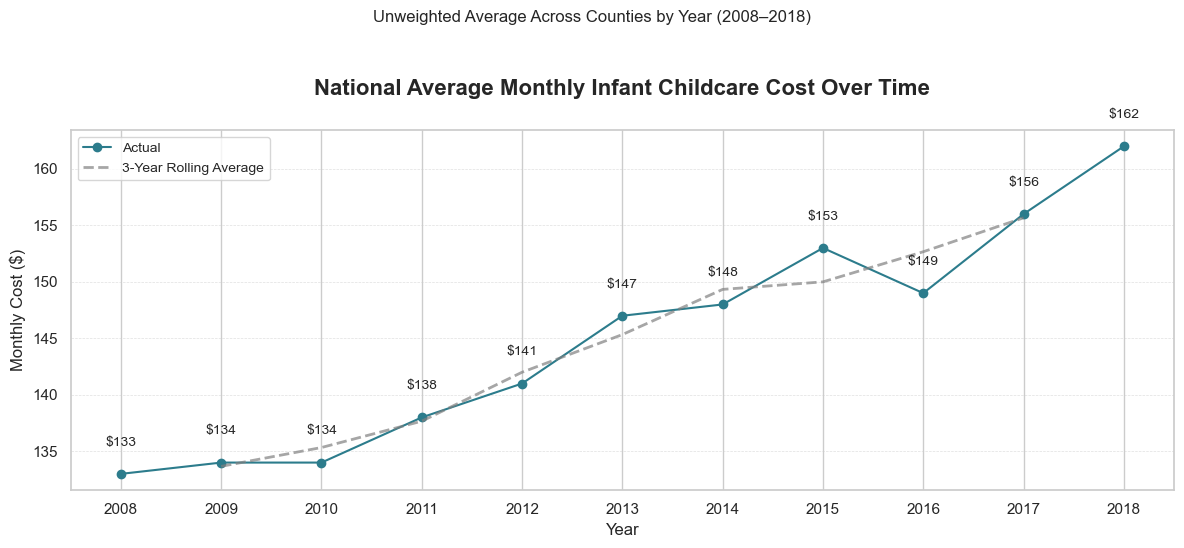

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# National average data
avg_cost_by_year = {
    2008: 133, 2009: 134, 2010: 134,
    2011: 138, 2012: 141, 2013: 147,
    2014: 148, 2015: 153, 2016: 149,
    2017: 156, 2018: 162
}
df_trend = pd.DataFrame(list(avg_cost_by_year.items()), columns=['Year', 'Monthly Cost ($)'])
df_trend['Smoothed'] = df_trend['Monthly Cost ($)'].rolling(window=3, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Main and smoothed trendline
ax.plot(df_trend['Year'], df_trend['Monthly Cost ($)'], marker='o', color='#2c7c8c', label='Actual')
ax.plot(df_trend['Year'], df_trend['Smoothed'], linestyle='--', linewidth=2, color='gray', alpha=0.7, label='3-Year Rolling Average')

# Title & subtitle with spacing
ax.set_title("National Average Monthly Infant Childcare Cost Over Time", fontsize=16, weight='bold', pad=25)
plt.suptitle("Unweighted Average Across Counties by Year (2008–2018)", fontsize=12, y=0.91)

# Axis labels
ax.set_ylabel("Monthly Cost ($)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)

# Data labels
for x, y in zip(df_trend['Year'], df_trend['Monthly Cost ($)']):
    ax.text(x, y + 2.5, f"${y}", ha='center', fontsize=10)

# Grid, legend, layout
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_xticks(df_trend['Year'])
plt.xticks(rotation=0)
ax.legend(loc='upper left', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.88])

# Save
fig.savefig("national_avg_infant_cost_over_time_smoothed_final.png", dpi=300, bbox_inches='tight')

# Show
plt.show()

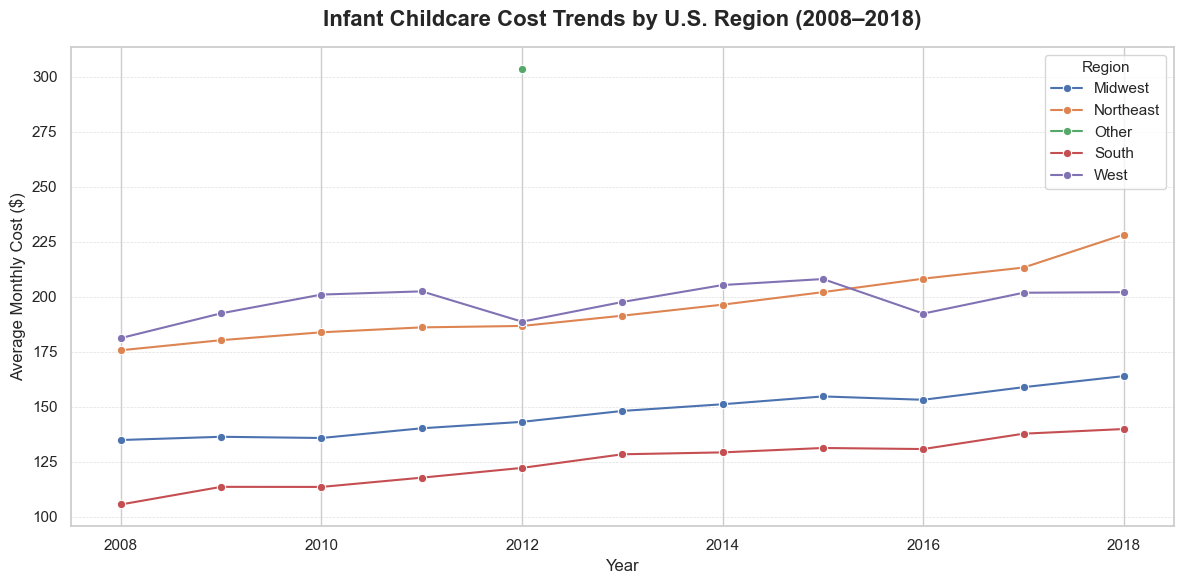

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name='nationaldatabaseofchildcare')

# Drop NA and select relevant columns
df_region = df[['State_Name', 'StudyYear', 'MCInfant']].dropna()

# Map states to regions (US Census)
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# Assign region
def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

df_region['Region'] = df_region['State_Name'].apply(get_region)

# Group by year and region
df_trends = df_region.groupby(['Region', 'StudyYear'])['MCInfant'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trends, x='StudyYear', y='MCInfant', hue='Region', marker='o')

plt.title("Infant Childcare Cost Trends by U.S. Region (2008–2018)", fontsize=16, weight='bold', pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Monthly Cost ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Region", title_fontsize=11)
plt.tight_layout()

# Save
plt.savefig("infant_cost_trends_by_region.png", dpi=300, bbox_inches='tight')
plt.show()

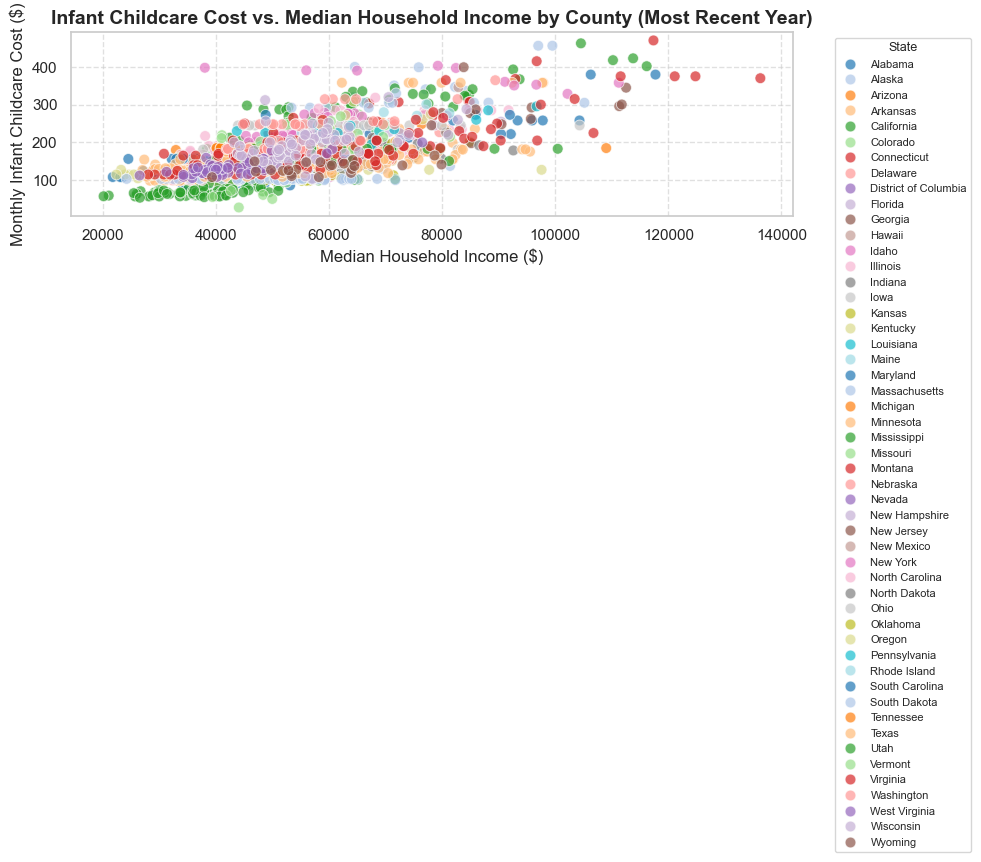

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name='nationaldatabaseofchildcare')

# Filter for the most recent year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year].copy()

# Plot: Scatter of MHI vs. MCInfant
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_latest,
    x='MHI',
    y='MCInfant',
    hue='State_Name',
    palette='tab20',
    alpha=0.7,
    edgecolor='white',
    s=60
)

plt.title("Infant Childcare Cost vs. Median Household Income by County (Most Recent Year)", fontsize=14, weight='bold')
plt.xlabel("Median Household Income ($)", fontsize=12)
plt.ylabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=9)
plt.tight_layout()

# Save
plt.savefig("infant_cost_vs_median_income_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

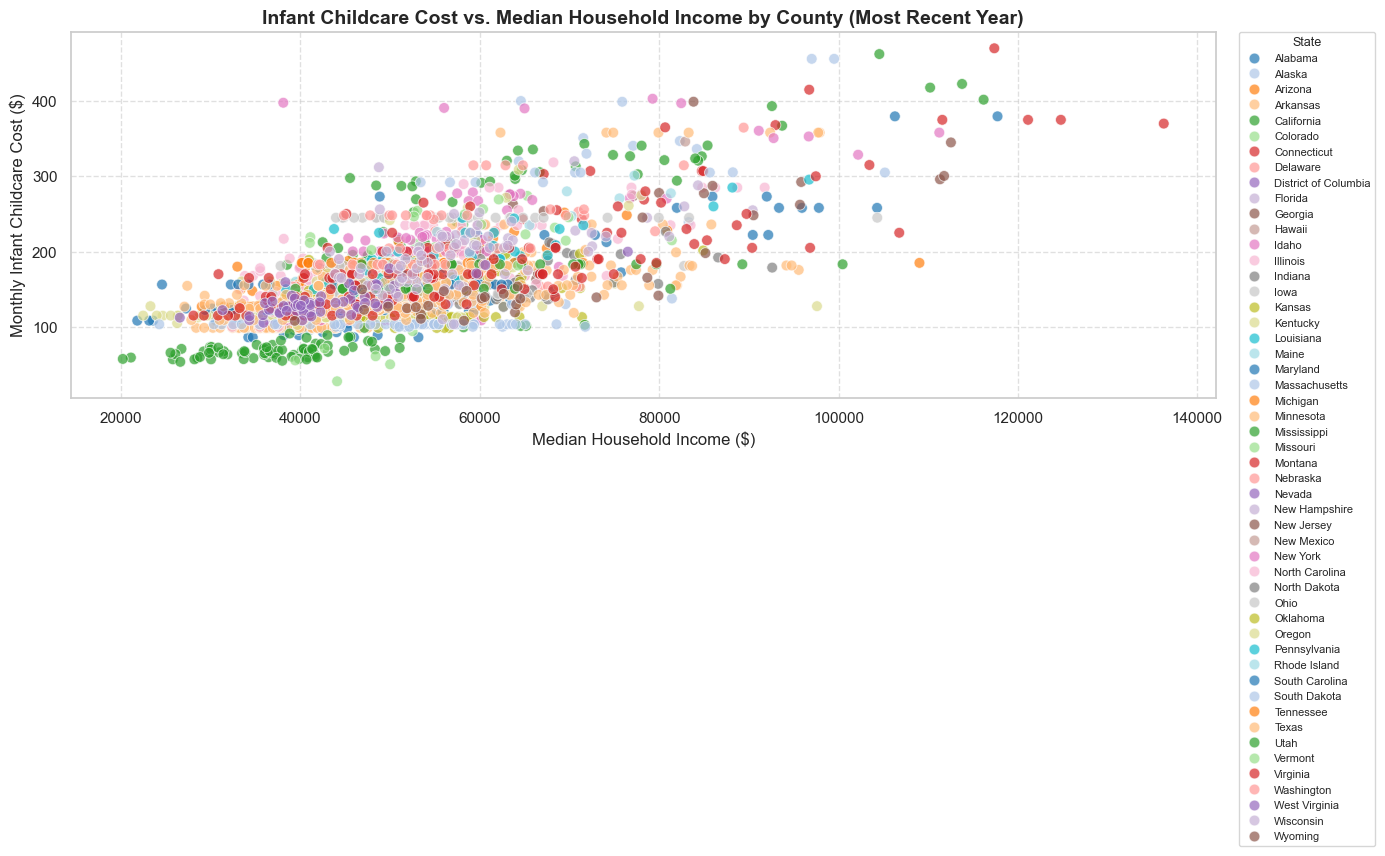

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name='nationaldatabaseofchildcare')

# Filter for the most recent year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year].copy()

# Set up the figure with a wider aspect
plt.figure(figsize=(14, 7))  # Wider layout
sns.scatterplot(
    data=df_latest,
    x='MHI',
    y='MCInfant',
    hue='State_Name',
    palette='tab20',
    alpha=0.7,
    edgecolor='white',
    s=60
)

plt.title("Infant Childcare Cost vs. Median Household Income by County (Most Recent Year)", fontsize=14, weight='bold')
plt.xlabel("Median Household Income ($)", fontsize=12)
plt.ylabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Spread legend vertically
plt.legend(
    title='State',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=8,
    title_fontsize=9
)

plt.tight_layout()
plt.savefig("infant_cost_vs_median_income_scatter_expanded.png", dpi=300, bbox_inches='tight')
plt.show()

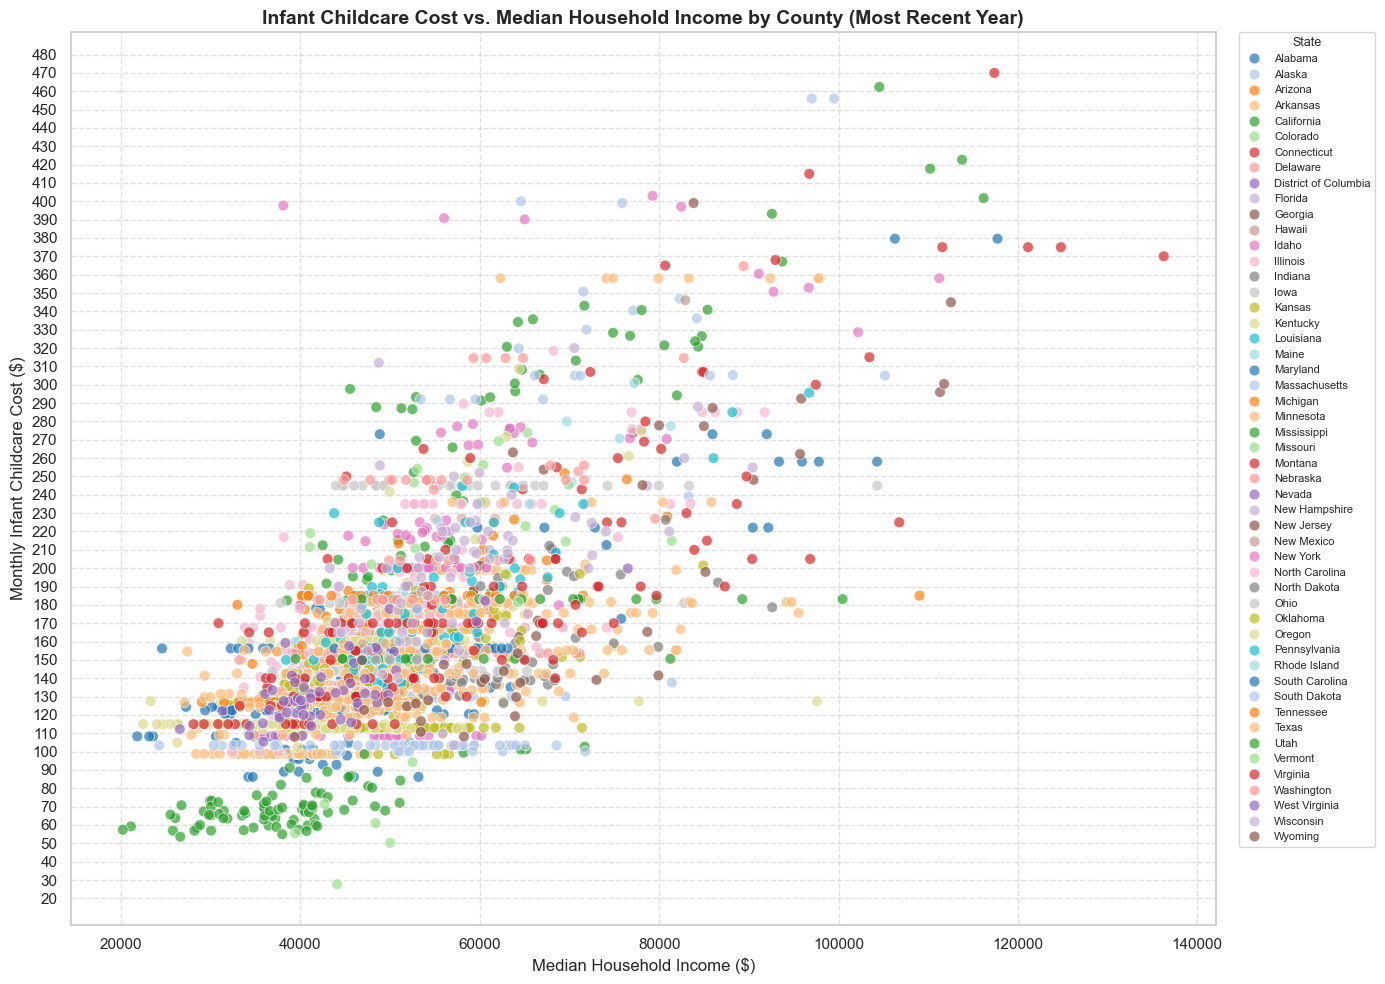

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset again just in case
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name="nationaldatabaseofchildcare")

# Get most recent year
latest_year = df['StudyYear'].max()
df_latest = df[df['StudyYear'] == latest_year].copy()

# Set the figure size for better vertical stretch
plt.figure(figsize=(14, 10))  # Taller plot to match legend height

# Scatter plot
sns.scatterplot(
    data=df_latest,
    x='MHI',
    y='MCInfant',
    hue='State_Name',
    palette='tab20',
    alpha=0.7,
    edgecolor='white',
    s=60
)

# Title and labels
plt.title("Infant Childcare Cost vs. Median Household Income by County (Most Recent Year)", fontsize=14, weight='bold')
plt.xlabel("Median Household Income ($)", fontsize=12)
plt.ylabel("Monthly Infant Childcare Cost ($)", fontsize=12)

# Y-axis in intervals of 10
y_min = int(df_latest['MCInfant'].min() // 10 * 10)
y_max = int(df_latest['MCInfant'].max() // 10 * 10 + 20)
plt.yticks(np.arange(y_min, y_max, 10))

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(
    title='State',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=8,
    title_fontsize=9
)

# Layout and save
plt.tight_layout()
plt.savefig("infant_cost_vs_median_income_scatter_aligned.png", dpi=300, bbox_inches='tight')
plt.show()

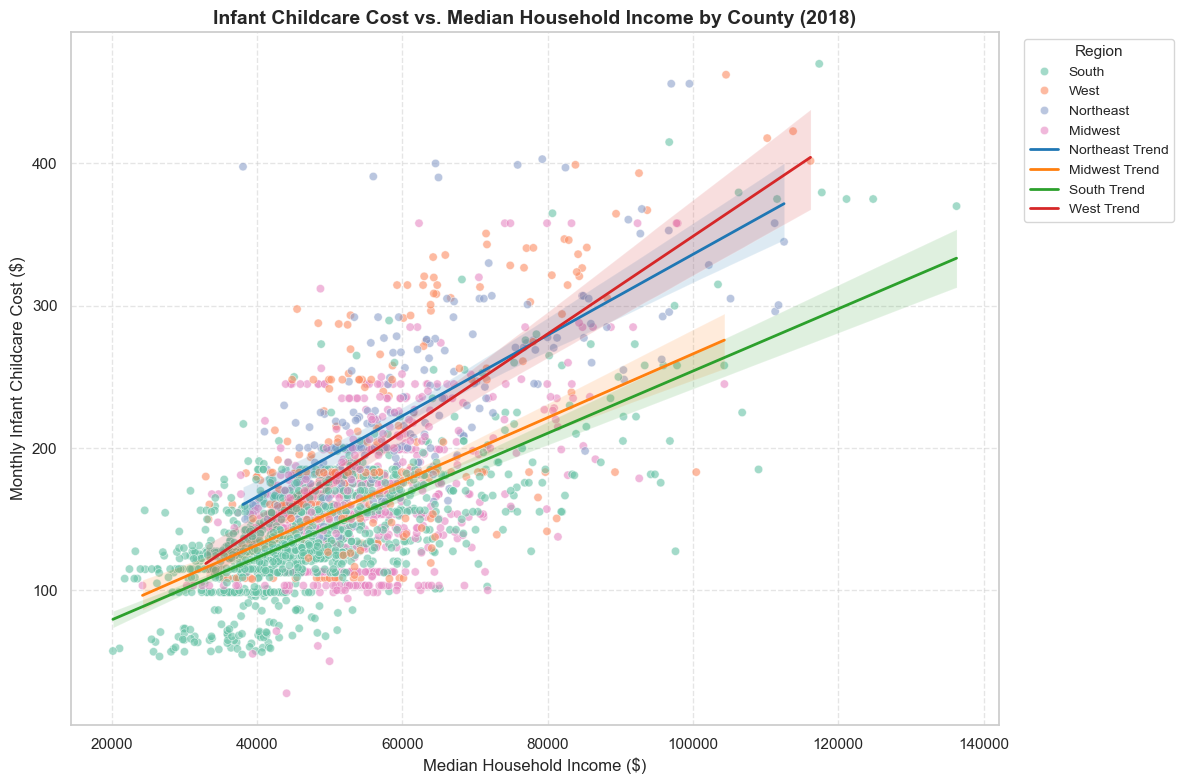

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Map states to regions
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
              'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
              'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska',
             'California', 'Hawaii', 'Oregon', 'Washington']
}

def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

# Assign region
df_latest['Region'] = df_latest['State_Name'].apply(get_region)

# Prep data
scatter_df = df_latest[['MHI', 'MCInfant', 'Region']].dropna()

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=scatter_df, x='MHI', y='MCInfant', hue='Region', alpha=0.6, palette='Set2')

# Add trend lines by region
for region, color in zip(['Northeast', 'Midwest', 'South', 'West'], ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    sns.regplot(data=scatter_df[scatter_df['Region'] == region], x='MHI', y='MCInfant',
                scatter=False, color=color, label=f'{region} Trend', line_kws={'lw': 2})

# Layout
plt.title("Infant Childcare Cost vs. Median Household Income by County (2018)", fontsize=14, weight='bold')
plt.xlabel("Median Household Income ($)", fontsize=12)
plt.ylabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Region', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Save
plt.savefig("infant_cost_vs_income_by_region_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [114]:
import pandas as pd

# Assuming df_latest is already filtered for the most recent year (e.g., 2018)
# If not, run this first to get the latest year per county
df_latest = df.loc[df.groupby('County_FIPS_Code')['StudyYear'].idxmax()]

# Map each state to a region
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
              'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
              'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

# Create the DataFrame with only required columns
df_scatter_df = df_latest[['State_Name', 'County_Name', 'MHI', 'MCInfant']].copy()
df_scatter_df.dropna(subset=['MHI', 'MCInfant'], inplace=True)

# Add region classification
df_scatter_df['Region'] = df_scatter_df['State_Name'].apply(get_region)

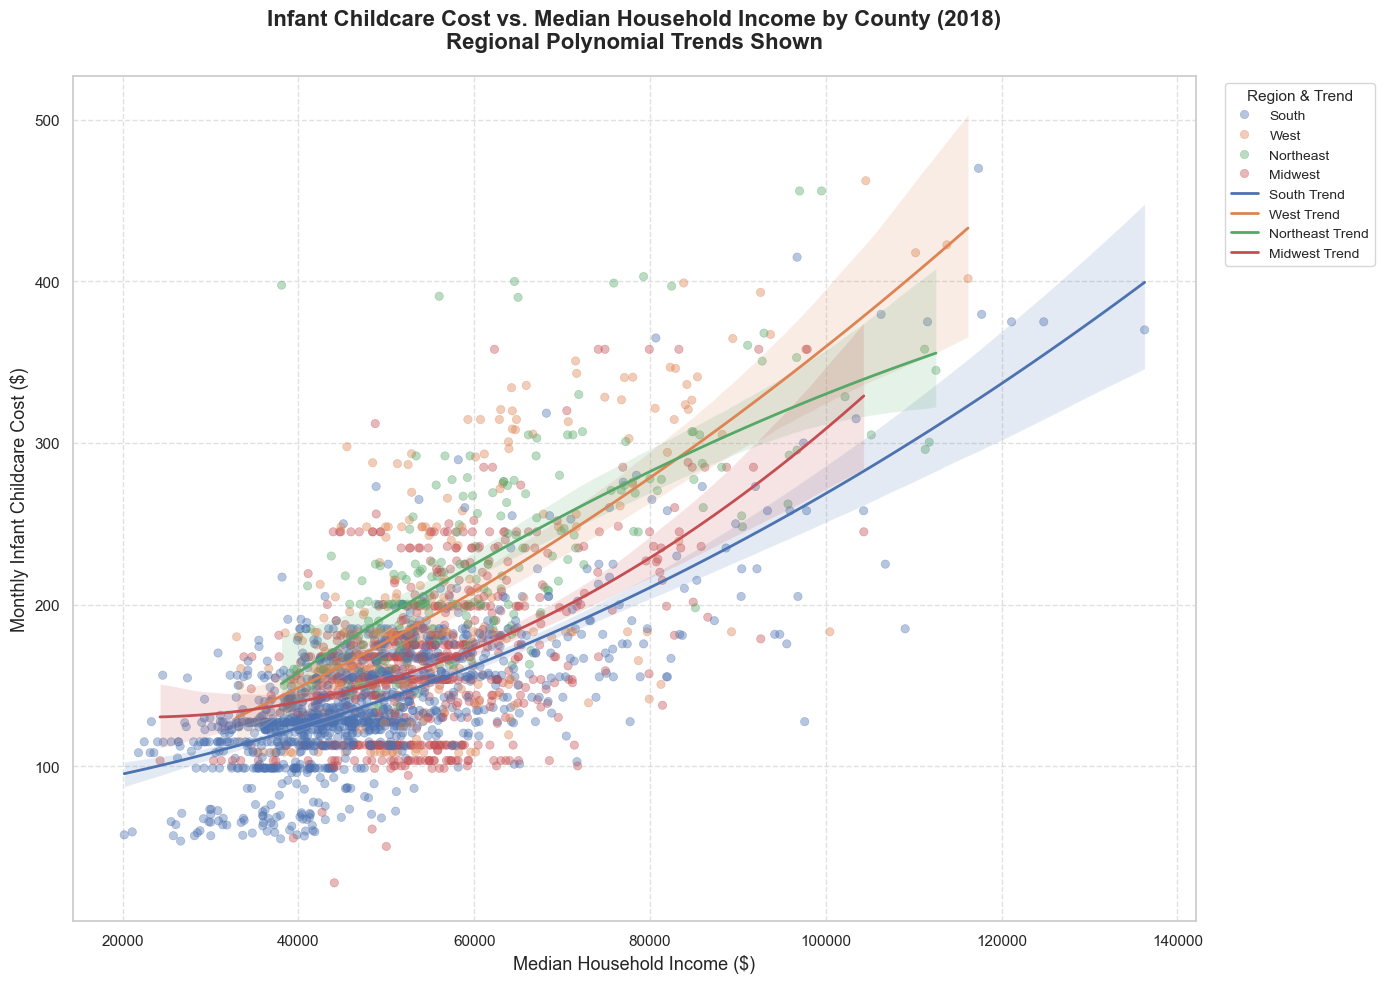

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Base scatter plot
sns.scatterplot(
    data=df_scatter_df,
    x='MHI',
    y='MCInfant',
    hue='Region',
    alpha=0.4,
    edgecolor=None,
    ax=ax
)

# Add 2nd-degree polynomial regression lines per region
regions = df_scatter_df['Region'].unique()
for region in regions:
    sns.regplot(
        data=df_scatter_df[df_scatter_df['Region'] == region],
        x='MHI',
        y='MCInfant',
        order=2,
        scatter=False,
        label=f"{region} Trend",
        line_kws={"linewidth": 2},
        ax=ax
    )

# Formatting
ax.set_title("Infant Childcare Cost vs. Median Household Income by County (2018)\nRegional Polynomial Trends Shown", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Median Household Income ($)", fontsize=13)
ax.set_ylabel("Monthly Infant Childcare Cost ($)", fontsize=13)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title='Region & Trend', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')

# Final layout and save
plt.tight_layout()
fig.savefig("infant_cost_vs_income_polynomial_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [118]:
import pandas as pd

# Load the dataset
file_path = "/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices (1).xlsx"
df = pd.read_excel(file_path, sheet_name='nationaldatabaseofchildcare')

# Filter to most recent year per county
df_latest = df.loc[df.groupby('County_FIPS_Code')['StudyYear'].idxmax()].copy()

# Define US Census regions
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
              'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
              'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

# Create cleaned modeling dataframe
df_model = df_latest[['State_Name', 'MHI', 'MCInfant']].dropna().copy()
df_model['Region'] = df_model['State_Name'].apply(get_region)

# Encode region for modeling (optional depending on next visual)
df_model_encoded = pd.get_dummies(df_model, columns=['Region'], drop_first=True)

df_model_encoded.head()

State_Name      MHI  MCInfant  Region_Northeast  Region_South  Region_West
10    Alabama  58786.0    120.41             False          True        False
21    Alabama  55962.0    120.41             False          True        False
32    Alabama  34186.0     86.20             False          True        False
43    Alabama  45340.0    104.83             False          True        False
54    Alabama  48695.0    178.08             False          True        False

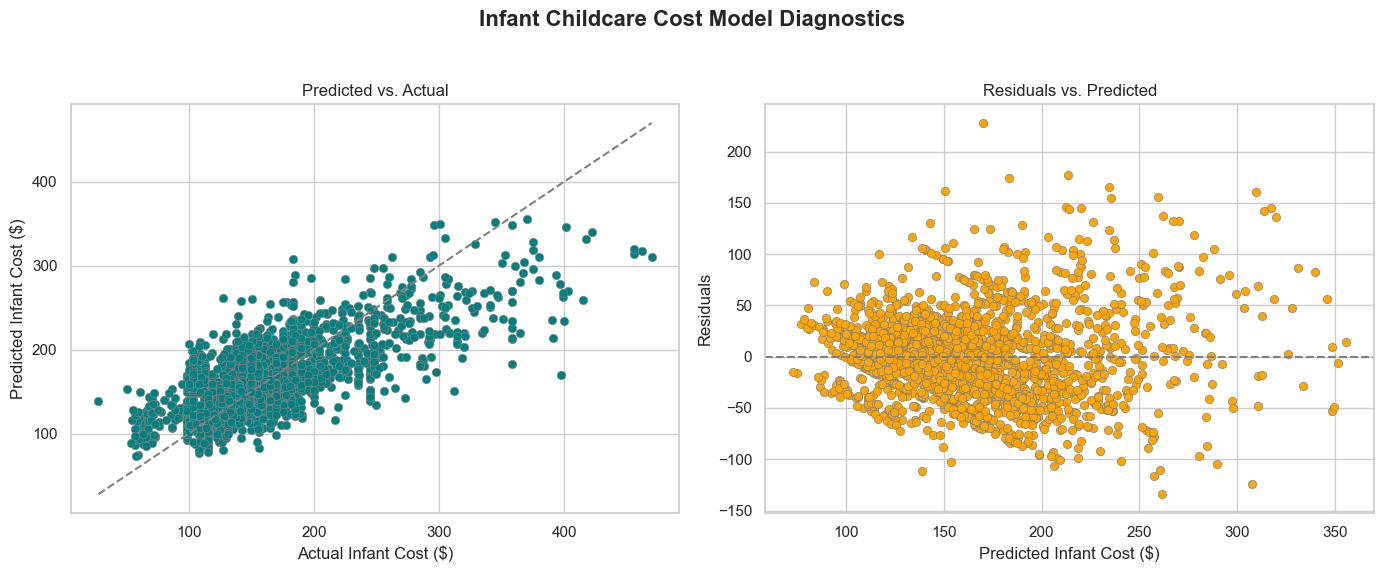

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature matrix (include region dummies + MHI)
X = df_model_encoded.drop(columns=['MCInfant', 'State_Name'])
y = df_model_encoded['MCInfant']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)
residuals = y - y_pred

# Create diagnostic plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Predicted vs. Actual
sns.scatterplot(x=y, y=y_pred, ax=axs[0], color='teal', edgecolor='gray')
axs[0].plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
axs[0].set_xlabel("Actual Infant Cost ($)")
axs[0].set_ylabel("Predicted Infant Cost ($)")
axs[0].set_title("Predicted vs. Actual")

# Residuals plot
sns.scatterplot(x=y_pred, y=residuals, ax=axs[1], color='orange', edgecolor='gray')
axs[1].axhline(0, linestyle='--', color='gray')
axs[1].set_xlabel("Predicted Infant Cost ($)")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Residuals vs. Predicted")

# Overall formatting
plt.suptitle("Infant Childcare Cost Model Diagnostics", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save
fig.savefig("infant_cost_model_diagnostics.png", dpi=300, bbox_inches='tight')
plt.show()

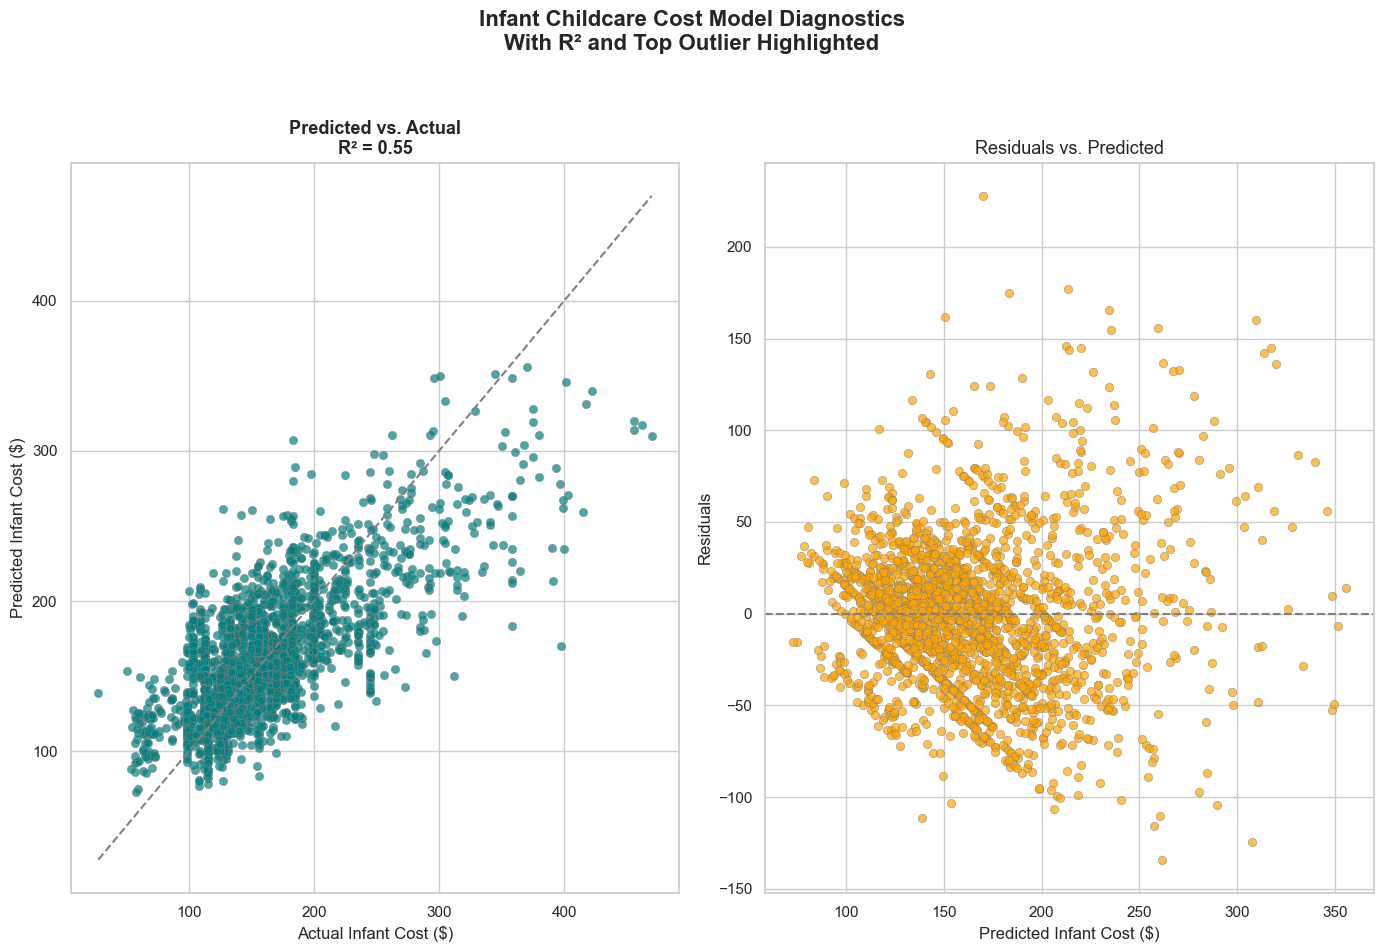

In [132]:
# Import required library
from sklearn.metrics import r2_score

# Calculate R²
r2 = r2_score(y, y_pred)

# Identify the data point with the largest residual (use positional index)
residuals_array = np.abs(residuals.values)
outlier_pos = residuals_array.argmax()
outlier_pred = y_pred[outlier_pos]
outlier_actual = y.values[outlier_pos]
residual_val = residuals.values[outlier_pos]

# Plot diagnostics
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

# Left: Predicted vs Actual
sns.scatterplot(x=y, y=y_pred, ax=ax[0], color='teal', edgecolor='gray', alpha=0.7)
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
ax[0].set_xlabel("Actual Infant Cost ($)", fontsize=12)
ax[0].set_ylabel("Predicted Infant Cost ($)", fontsize=12)
ax[0].set_title(f"Predicted vs. Actual\nR² = {r2:.2f}", fontsize=13, weight='bold')

# Right: Residuals vs Predicted
sns.scatterplot(x=y_pred, y=residuals, ax=ax[1], color='orange', edgecolor='gray', alpha=0.7)
ax[1].axhline(0, linestyle='--', color='gray')
ax[1].set_xlabel("Predicted Infant Cost ($)", fontsize=12)
ax[1].set_ylabel("Residuals", fontsize=12)
ax[1].set_title("Residuals vs. Predicted", fontsize=13)

# Final formatting
plt.suptitle("Infant Childcare Cost Model Diagnostics\nWith R² and Top Outlier Highlighted",
             fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save figure
fig.savefig("infant_cost_model_diagnostics_annotated.png", dpi=300, bbox_inches='tight')

# Display plot
plt.show()

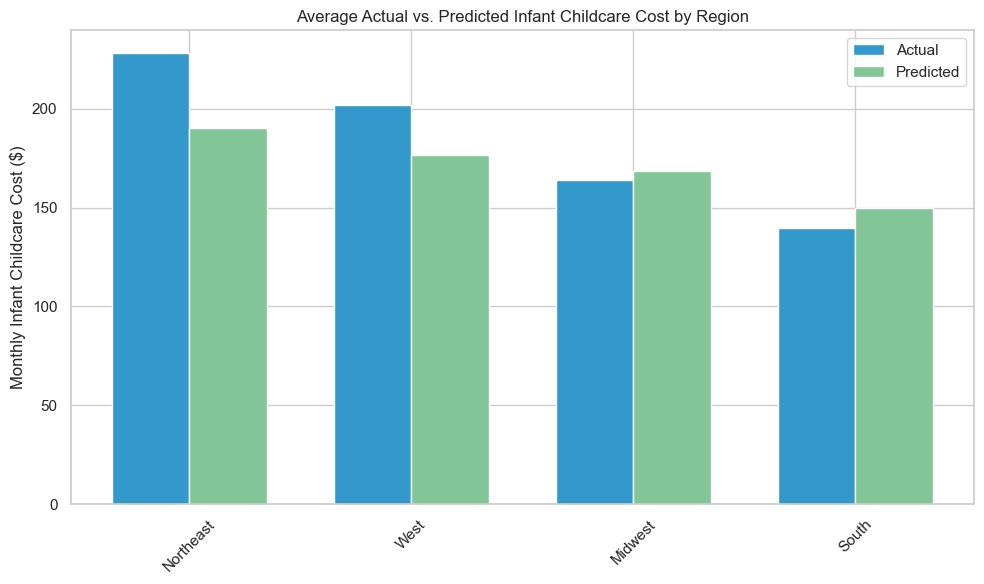

In [134]:
# Filter to most recent year by county
df_latest = df.loc[df.groupby('County_FIPS_Code')['StudyYear'].idxmax()].copy()

# Define U.S. regions
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
              'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas',
              'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}
def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

df_latest['Region'] = df_latest['State_Name'].apply(get_region)

# Prepare modeling inputs
model_df = df_latest[['MHI', 'MCInfant', 'Region']].dropna()
X = model_df[['MHI']]
y = model_df['MCInfant']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Add predicted values
model_df['Predicted'] = model.predict(X)

# Group by region and compute average actual and predicted
df_grouped = model_df.groupby('Region')[['MCInfant', 'Predicted']].mean().round(1).reset_index()
df_grouped = df_grouped.sort_values('MCInfant', ascending=False)

# Plot side-by-side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_grouped))

plt.bar(x, df_grouped['MCInfant'], width=bar_width, label='Actual', color='#3399cc')
plt.bar([p + bar_width for p in x], df_grouped['Predicted'], width=bar_width, label='Predicted', color='#82c596')

plt.xticks([p + bar_width / 2 for p in x], df_grouped['Region'], rotation=45)
plt.ylabel('Monthly Infant Childcare Cost ($)')
plt.title('Average Actual vs. Predicted Infant Childcare Cost by Region')
plt.legend()

plt.tight_layout()
plt.savefig("regional_actual_vs_predicted_costs.png", dpi=300, bbox_inches='tight')
plt.show()

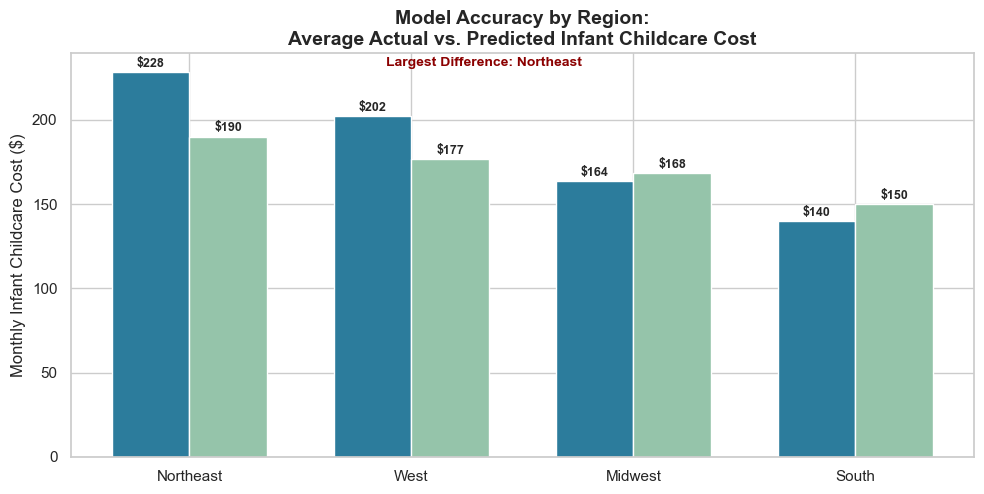

In [142]:
# Plot with enhancements
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_grouped))

# Plot bars
bars1 = plt.bar(x, df_grouped['MCInfant'], width=bar_width, label='Actual', color='#2c7c9c')
bars2 = plt.bar([p + bar_width for p in x], df_grouped['Predicted'], width=bar_width, label='Predicted', color='#95c4aa')

# Add data labels
for i, rect in enumerate(bars1):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 3,
             f"${rect.get_height():.0f}", ha='center', fontsize=9, fontweight='bold')
for i, rect in enumerate(bars2):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 3,
             f"${rect.get_height():.0f}", ha='center', fontsize=9, fontweight='bold')

import numpy as np

# Highlight region with biggest prediction gap
df_grouped['Gap'] = df_grouped['Predicted'] - df_grouped['MCInfant']
highlight_region = df_grouped.loc[df_grouped['Gap'].abs().idxmax(), 'Region']

# Center x position using NumPy mean
center_x = np.mean(x)  # `x` is a range object, convert to numeric mean

# Add annotation for region with biggest difference
plt.text(center_x, max(df_grouped['MCInfant']) + 4,
         f"Largest Difference: {highlight_region}",
         fontsize=10, color='darkred', weight='bold', ha='center')

# Labels & layout
plt.xticks([p + bar_width / 2 for p in x], df_grouped['Region'], rotation=0)
plt.ylabel('Monthly Infant Childcare Cost ($)', fontsize=12)
plt.title("Model Accuracy by Region:\nAverage Actual vs. Predicted Infant Childcare Cost",
          fontsize=14, weight='bold')

# Adjust layout so title doesn't overlap annotation
plt.tight_layout(rect=[0, 0.03, 1, 0.88])

# Save final
plt.savefig("regional_cost_model_accuracy_annotated_centered_fixed.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_12819/4019052735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Region', y='MCInfant', data=model_df,


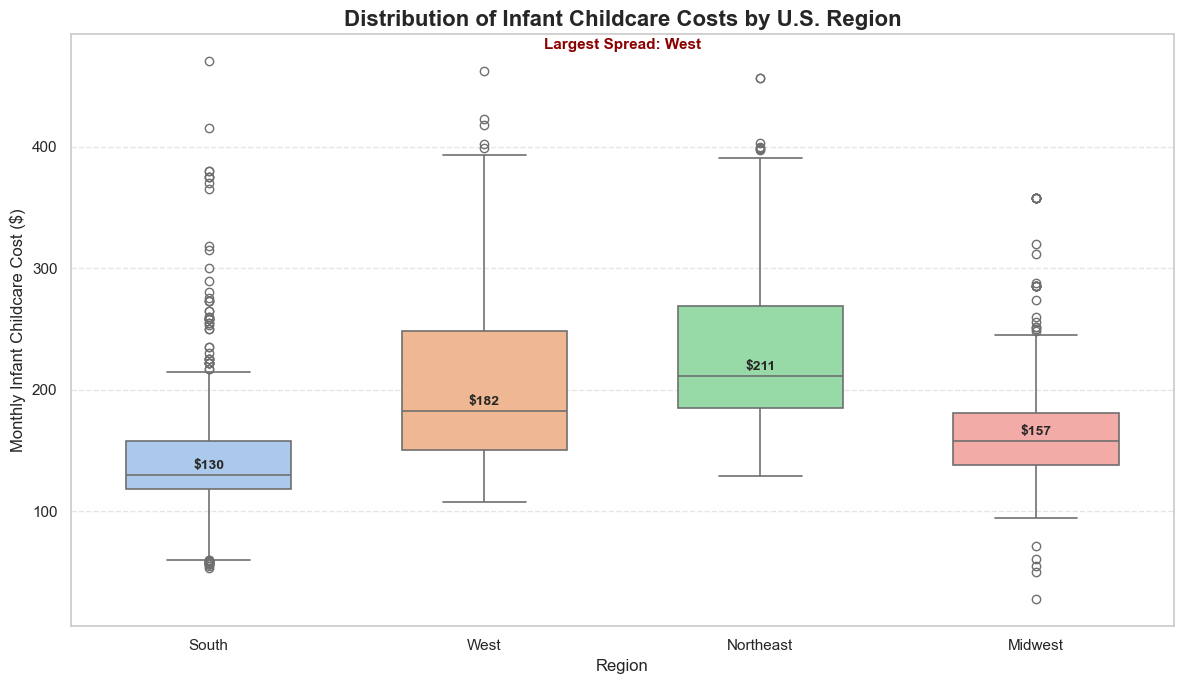

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the base boxplot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='Region', y='MCInfant', data=model_df,
                 palette='pastel', width=0.6, linewidth=1.2)

# Calculate medians and IQR per region
grouped = model_df.groupby('Region')['MCInfant']
medians = grouped.median()
iqr_values = grouped.quantile(0.75) - grouped.quantile(0.25)

# Get regions in correct order as plotted
region_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Add median labels above each box
for i, region in enumerate(region_labels):
    median_val = medians[region]
    plt.text(i, median_val + 5, f"${int(median_val)}",
             ha='center', fontsize=10, fontweight='bold')

# Identify and highlight region with largest IQR
max_iqr_region = iqr_values.idxmax()
highlight_idx = region_labels.index(max_iqr_region)
box_artists = ax.artists
if highlight_idx < len(box_artists):
    box_artists[highlight_idx].set_edgecolor('red')
    box_artists[highlight_idx].set_linewidth(2)

# Centered "Largest Spread" label — moved slightly lower
center_x = np.mean(ax.get_xlim())
label_y = max(grouped.max()) + 10  # space out a bit more
plt.text(center_x, label_y,
         f"Largest Spread: {max_iqr_region}",
         fontsize=11, color='darkred', weight='bold', ha='center')

# Final layout
plt.title("Distribution of Infant Childcare Costs by U.S. Region", fontsize=16, weight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save final image
plt.savefig("boxplot_infant_cost_by_region_final_labeled.png", dpi=300, bbox_inches='tight')
plt.show()

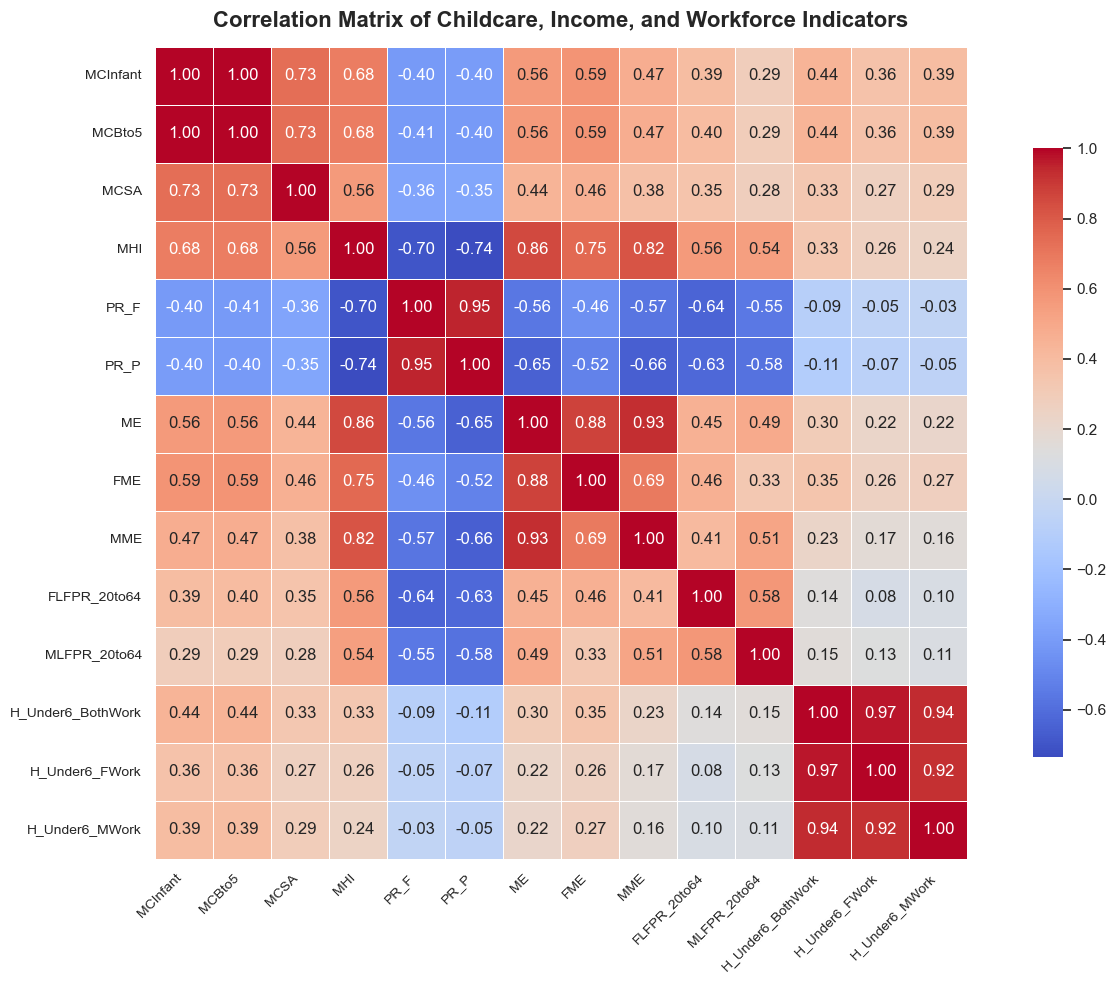

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for correlation analysis
corr_cols = [
    'MCInfant', 'MCBto5', 'MCSA', 'MHI', 'PR_F', 'PR_P', 'ME', 'FME', 'MME',
    'FLFPR_20to64', 'MLFPR_20to64', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork'
]

# Filter and drop rows with missing values
df_corr = df_latest[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Set up plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create heatmap
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                 linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Title and styling
plt.title("Correlation Matrix of Childcare, Income, and Workforce Indicators", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure
plt.tight_layout()
plt.savefig("correlation_matrix_childcare_indicators.png", dpi=300, bbox_inches='tight')
plt.show()

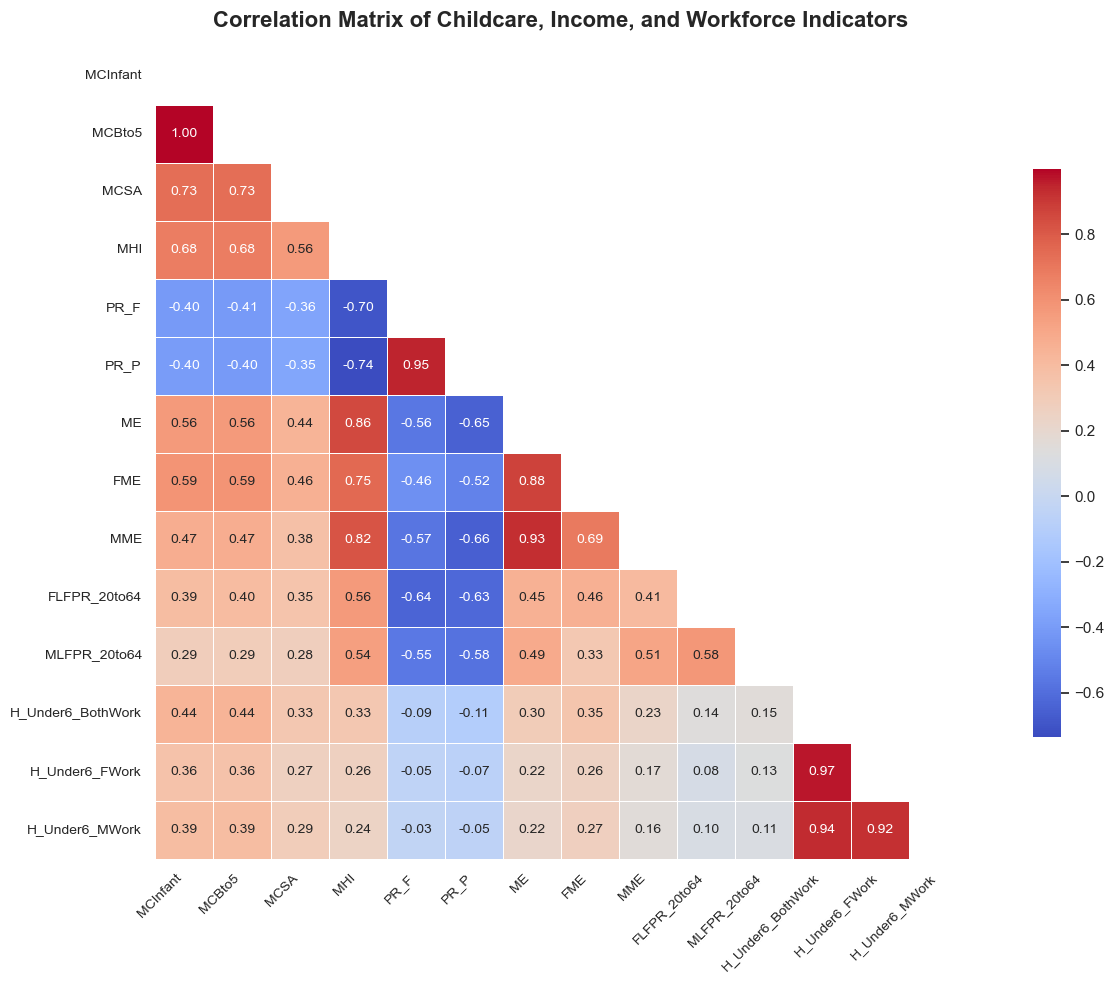

In [156]:
import numpy as np

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create figure
plt.figure(figsize=(14, 10))
sns.set(style="white")

# Draw heatmap
ax = sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7},
    annot_kws={"fontsize": 10}
)

# Title and axes formatting
plt.title("Correlation Matrix of Childcare, Income, and Workforce Indicators", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the improved heatmap
plt.tight_layout()
plt.savefig("correlation_matrix_childcare_enhanced.png", dpi=300, bbox_inches='tight')
plt.show()

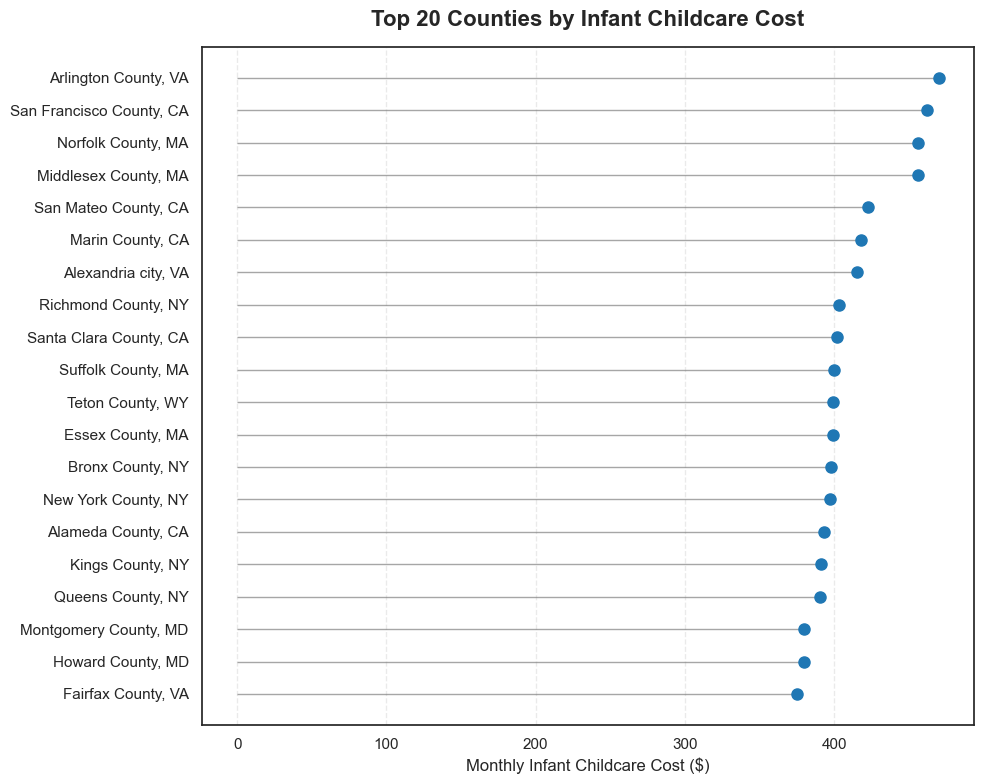

In [158]:
# Prepare top counties by cost
top_counties = df_latest[['County_Name', 'State_Abbreviation', 'MCInfant']].dropna()
top_counties = top_counties.sort_values(by='MCInfant', ascending=False).head(20)

# Format county label
top_counties['Label'] = top_counties['County_Name'] + ', ' + top_counties['State_Abbreviation']

# Sort for plotting
top_counties = top_counties.sort_values(by='MCInfant')

# Plot lollipop chart
plt.figure(figsize=(10, 8))
plt.hlines(y=top_counties['Label'], xmin=0, xmax=top_counties['MCInfant'], color='gray', alpha=0.7, linewidth=1)
plt.plot(top_counties['MCInfant'], top_counties['Label'], 'o', markersize=8, color='#1f77b4')

# Labels and title
plt.xlabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.title("Top 20 Counties by Infant Childcare Cost", fontsize=16, weight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

# Save the chart
plt.savefig("top20_infant_childcare_costs_lollipop.png", dpi=300, bbox_inches='tight')
plt.show()

In [160]:
# Filter for most recent year by county
df_latest = df.loc[df.groupby('County_FIPS_Code')['StudyYear'].idxmax()].copy()

# Define US Census regions
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
                  'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas',
                'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
              'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
              'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah',
             'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

df_latest['Region'] = df_latest['State_Name'].apply(get_region)

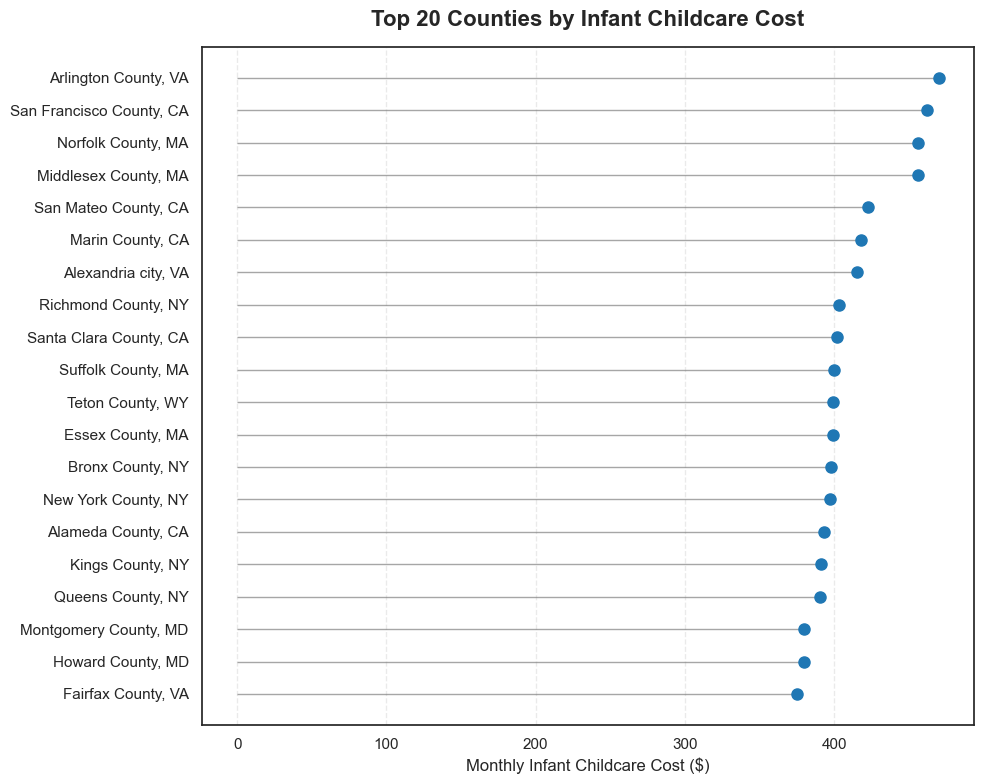

In [162]:
# Prepare top counties by cost
top_counties = df_latest[['County_Name', 'State_Abbreviation', 'MCInfant']].dropna()
top_counties = top_counties.sort_values(by='MCInfant', ascending=False).head(20)

# Format county label
top_counties['Label'] = top_counties['County_Name'] + ', ' + top_counties['State_Abbreviation']

# Sort for plotting
top_counties = top_counties.sort_values(by='MCInfant')

# Plot lollipop chart
plt.figure(figsize=(10, 8))
plt.hlines(y=top_counties['Label'], xmin=0, xmax=top_counties['MCInfant'], color='gray', alpha=0.7, linewidth=1)
plt.plot(top_counties['MCInfant'], top_counties['Label'], 'o', markersize=8, color='#1f77b4')

# Labels and title
plt.xlabel("Monthly Infant Childcare Cost ($)", fontsize=12)
plt.title("Top 20 Counties by Infant Childcare Cost", fontsize=16, weight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

# Save the chart
plt.savefig("top20_infant_childcare_costs_lollipop.png", dpi=300, bbox_inches='tight')
plt.show()

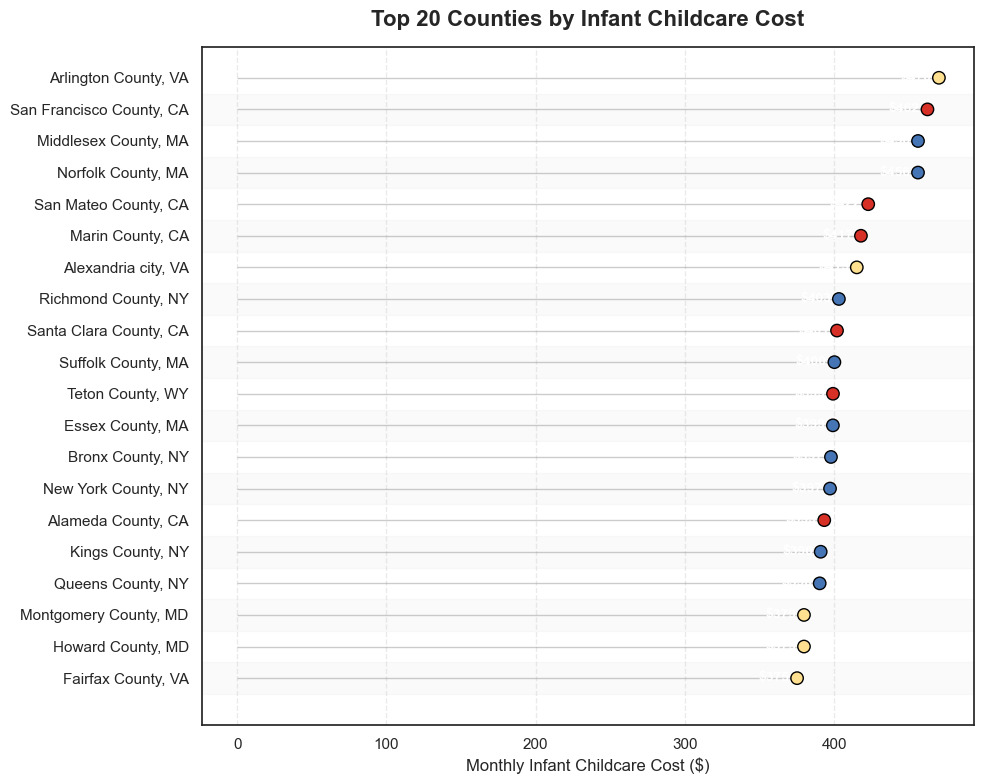

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure latest data by county
df_latest = df.loc[df.groupby('County_FIPS_Code')['StudyYear'].idxmax()].copy()

# Apply regions again if needed
region_map = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
              'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
              'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return 'Other'

df_latest['Region'] = df_latest['State_Name'].apply(get_region)

# Get top 20 counties by infant cost
top_counts = df_latest.nlargest(20, 'MCInfant').copy()
top_counts['Label'] = top_counts['County_Name'] + ', ' + top_counts['State_Abbreviation']
top_counts = top_counts.sort_values(by='MCInfant')

# Region color palette
region_colors = {
    'Northeast': '#4575b4',
    'Midwest': '#91bfdb',
    'South': '#fee090',
    'West': '#d73027'
}
top_counts['Color'] = top_counts['Region'].map(region_colors)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Lines
ax.hlines(y=top_counts['Label'], xmin=0, xmax=top_counts['MCInfant'], color='gray', alpha=0.4, linewidth=1)

# Dots
ax.scatter(top_counts['MCInfant'], top_counts['Label'],
           color=top_counts['Color'], s=80, edgecolor='black', zorder=3)

# Alternating background bars
for i in range(0, len(top_counts), 2):
    ax.axhspan(i - 0.5, i + 0.5, color='lightgray', alpha=0.1, zorder=0)

# Annotate with white text
for i, value in enumerate(top_counts['MCInfant']):
    ax.text(value - 5, i, f"${int(value)}", va='center', ha='right',
            fontsize=10, weight='bold', color='white')

# Titles and labels
ax.set_title("Top 20 Counties by Infant Childcare Cost", fontsize=16, weight='bold', pad=15)
ax.set_xlabel("Monthly Infant Childcare Cost ($)", fontsize=12)
ax.set_ylabel("")
ax.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

# Save
fig.savefig("top20_infant_childcare_costs_lollipop_enhanced.png", dpi=300, bbox_inches='tight')
plt.show()

In [172]:
# Convert burden from fraction to percent
df_burden['Burden'] = df_burden['Burden'] * 100

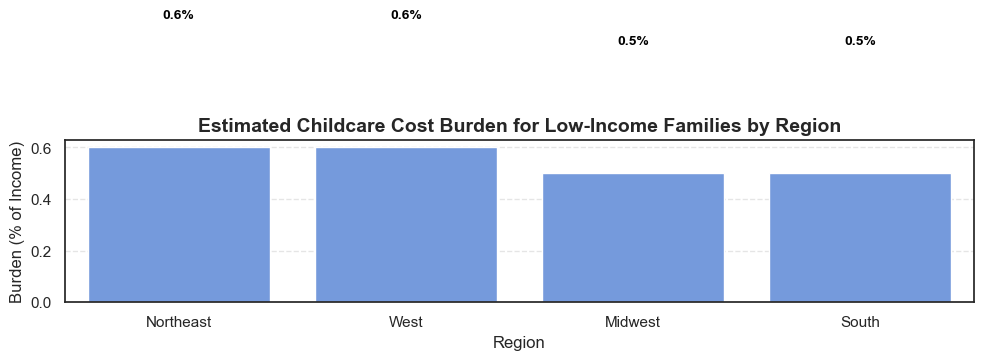

In [174]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_burden, x='Region', y='Burden', color='cornflowerblue')

# Annotate bars with true % values
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}%", 
             ha='center', fontsize=10, color='black', weight='bold')

# Final formatting
plt.title("Estimated Childcare Cost Burden for Low-Income Families by Region", fontsize=14, weight='bold')
plt.ylabel("Burden (% of Income)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("low_income_burden_cleaned.png", dpi=300, bbox_inches='tight')
plt.show()

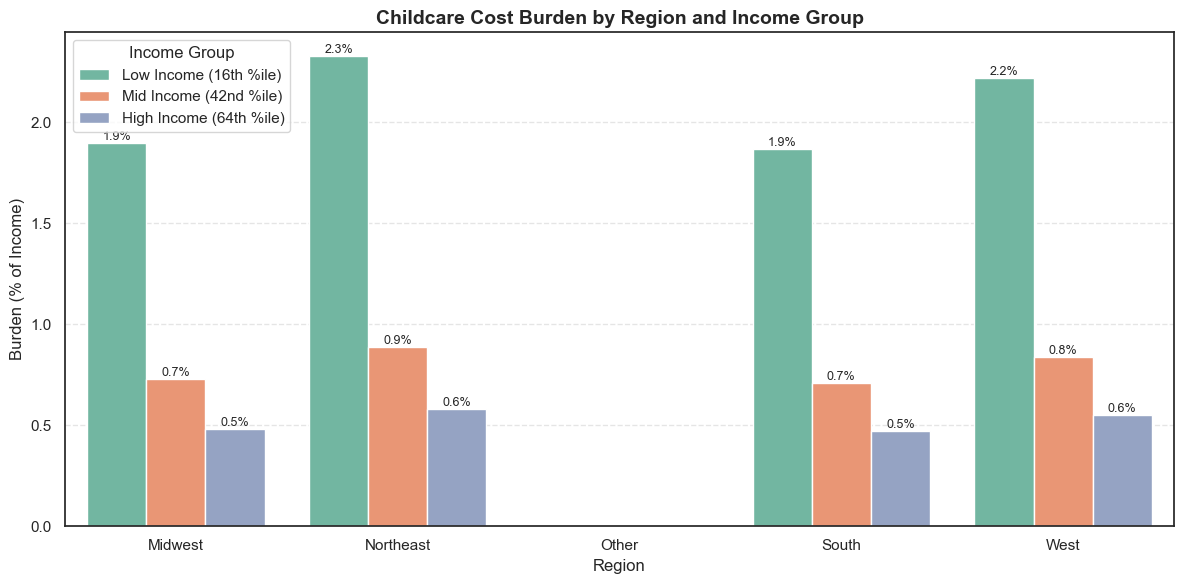

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (adjust these column names to your dataset structure if needed)
df_burden_full = df_latest[['State_Name', 'MHI', 'MCInfant']].copy()
df_burden_full['Region'] = df_burden_full['State_Name'].apply(get_region)

# Simulate burden estimates by income group
df_burden_full['Burden_Low'] = df_burden_full['MCInfant'] / (df_burden_full['MHI'] * 0.16) * 100
df_burden_full['Burden_Mid'] = df_burden_full['MCInfant'] / (df_burden_full['MHI'] * 0.42) * 100
df_burden_full['Burden_High'] = df_burden_full['MCInfant'] / (df_burden_full['MHI'] * 0.64) * 100

# Average by region
df_burden_region = df_burden_full.groupby('Region')[['Burden_Low', 'Burden_Mid', 'Burden_High']].mean().round(2).reset_index()

# Melt for plotting
df_burden_melted = df_burden_region.melt(id_vars='Region', value_vars=['Burden_Low', 'Burden_Mid', 'Burden_High'],
                                         var_name='Income Group', value_name='Burden (%)')

# Clean income group labels
df_burden_melted['Income Group'] = df_burden_melted['Income Group'].replace({
    'Burden_Low': 'Low Income (16th %ile)',
    'Burden_Mid': 'Mid Income (42nd %ile)',
    'Burden_High': 'High Income (64th %ile)'
})

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_burden_melted, x='Region', y='Burden (%)', hue='Income Group', palette='Set2')

# Add annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Formatting
plt.title("Childcare Cost Burden by Region and Income Group", fontsize=14, weight='bold')
plt.ylabel("Burden (% of Income)")
plt.xlabel("Region")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Income Group')
plt.tight_layout()

# Save output
plt.savefig("childcare_burden_by_income_group.png", dpi=300, bbox_inches='tight')
plt.show()

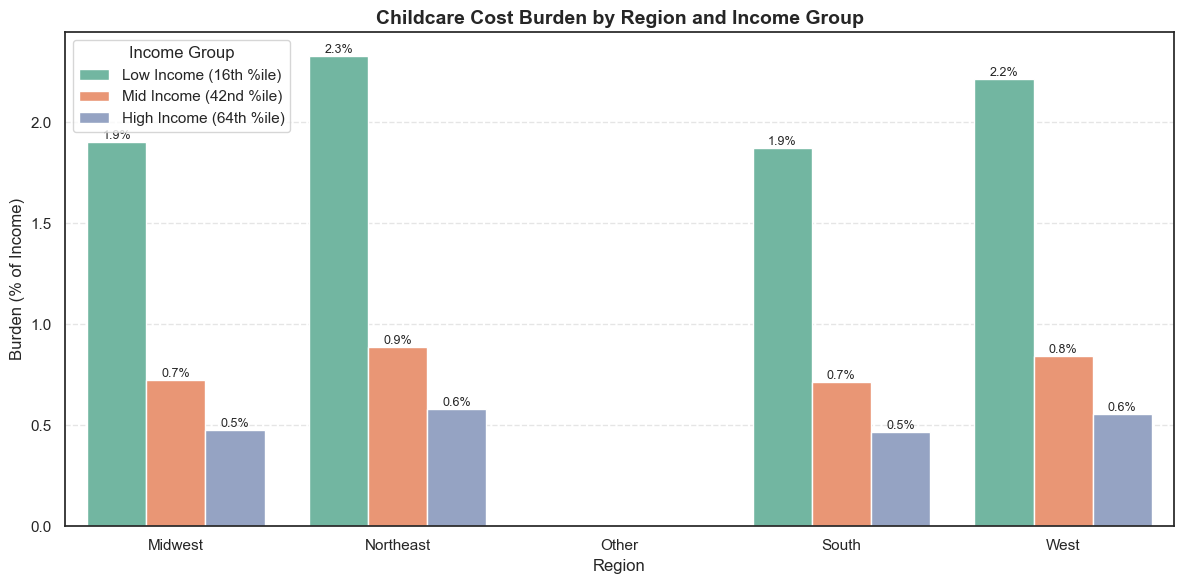

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_latest and get_region are already defined earlier
df_burden = df_latest[['State_Name', 'MHI', 'MCInfant']].copy()
df_burden['Region'] = df_burden['State_Name'].apply(get_region)

# Calculate burden estimates for income groups (as % of income)
df_burden['Burden_Low'] = df_burden['MCInfant'] / (df_burden['MHI'] * 0.16) * 100
df_burden['Burden_Mid'] = df_burden['MCInfant'] / (df_burden['MHI'] * 0.42) * 100
df_burden['Burden_High'] = df_burden['MCInfant'] / (df_burden['MHI'] * 0.64) * 100

# Average burden by region
df_region_burden = df_burden.groupby('Region')[['Burden_Low', 'Burden_Mid', 'Burden_High']].mean().reset_index()

# Melt to long format for plotting
df_burden_melted = df_region_burden.melt(id_vars='Region', var_name='Income Group', value_name='Burden (%)')

# Clean up labels
df_burden_melted['Income Group'] = df_burden_melted['Income Group'].replace({
    'Burden_Low': 'Low Income (16th %ile)',
    'Burden_Mid': 'Mid Income (42nd %ile)',
    'Burden_High': 'High Income (64th %ile)'
})

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_burden_melted, x='Region', y='Burden (%)', hue='Income Group', palette='Set2')

# Add annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Formatting
plt.title("Childcare Cost Burden by Region and Income Group", fontsize=14, weight='bold')
plt.ylabel("Burden (% of Income)")
plt.xlabel("Region")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Income Group')
plt.tight_layout()

# Save as high-res PNG
plt.savefig("childcare_burden_by_income_group.png", dpi=300, bbox_inches='tight')
plt.show()

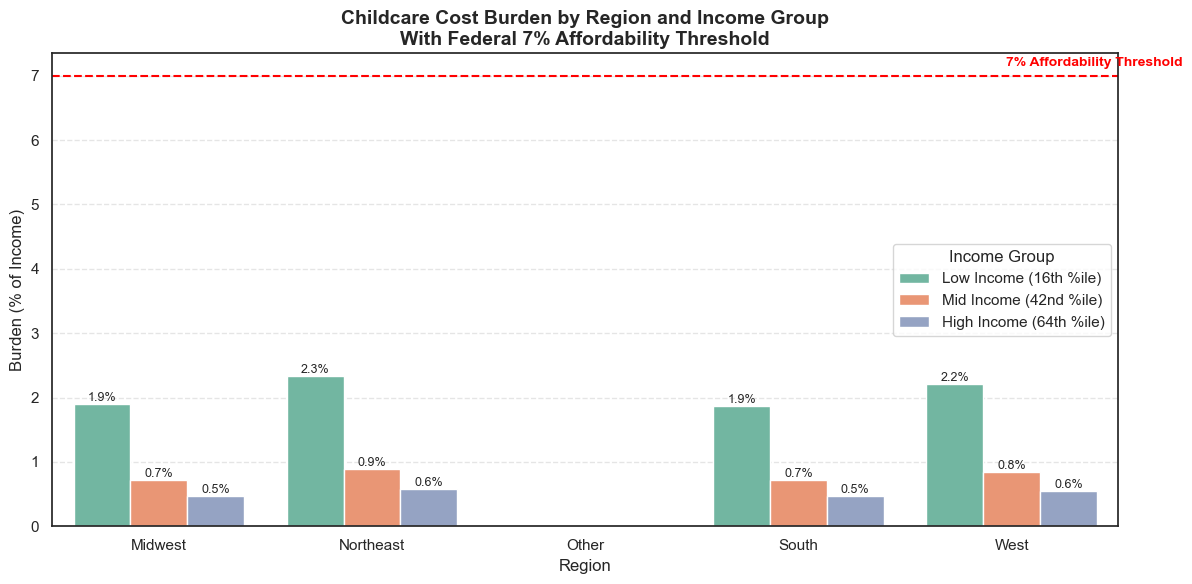

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_burden_melted, x='Region', y='Burden (%)', hue='Income Group', palette='Set2')

# Add 7% benchmark line
plt.axhline(7, color='red', linestyle='--', linewidth=1.5)
plt.text(len(df_burden_melted['Region'].unique()) - 0.2, 7.1, '7% Affordability Threshold', 
         color='red', fontsize=10, ha='right', va='bottom', weight='bold')

# Annotate each bar
for container in ax.containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Format chart
plt.title("Childcare Cost Burden by Region and Income Group\nWith Federal 7% Affordability Threshold", fontsize=14, weight='bold')
plt.ylabel("Burden (% of Income)")
plt.xlabel("Region")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Income Group')
plt.tight_layout()

# Save image
plt.savefig("childcare_burden_with_7pct_threshold.png", dpi=300, bbox_inches='tight')
plt.show()

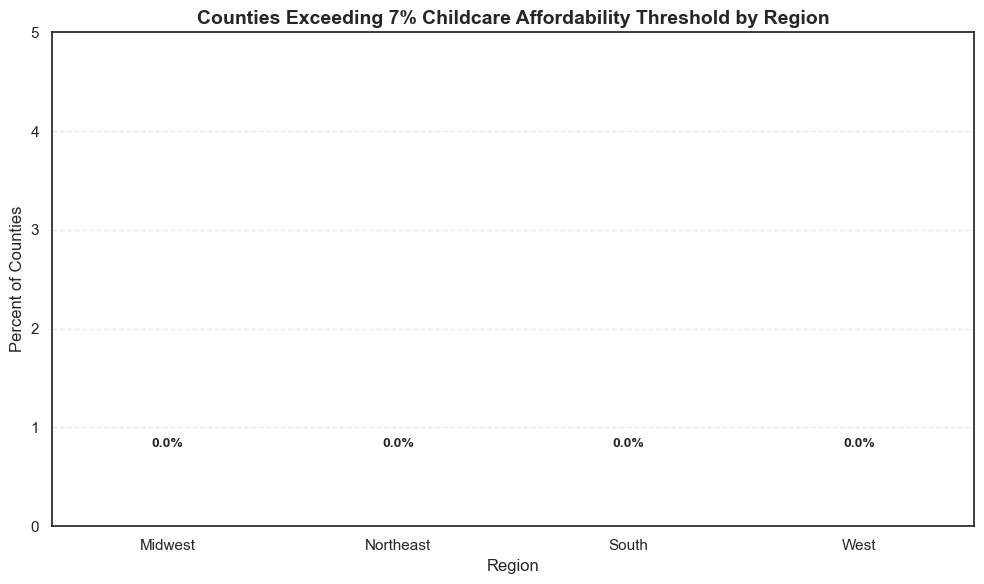

In [184]:
# Ensure threshold calculation exists
df_model['Burden'] = df_model['MCInfant'] / df_model['MHI']
df_model['Exceeds_Threshold'] = df_model['Burden'] > 0.07

# Count how many counties in each region exceed the 7% threshold
region_exceed_counts = df_model[df_model['Exceeds_Threshold']].groupby('Region').size().reset_index(name='Count')
region_total_counts = df_model.groupby('Region').size().reset_index(name='Total')

# Merge and compute percent
region_summary = pd.merge(region_exceed_counts, region_total_counts, on='Region', how='right').fillna(0)
region_summary['Percent'] = (region_summary['Count'] / region_summary['Total']) * 100

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=region_summary, x='Region', y='Percent', color='tomato')

# Add labels
for index, row in region_summary.iterrows():
    plt.text(index, row['Percent'] + 0.8, f"{row['Percent']:.1f}%", ha='center', fontsize=10, weight='bold')

# Styling
plt.title("Counties Exceeding 7% Childcare Affordability Threshold by Region", fontsize=14, weight='bold')
plt.ylabel("Percent of Counties")
plt.xlabel("Region")
plt.ylim(0, region_summary['Percent'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Save
plt.tight_layout()
plt.savefig("counties_exceeding_threshold_by_region_fixed.png", dpi=300)
plt.show()